   #                          <font color=green>   MIE1624H:  Introduction to Data Science and Analytics - Course Project


### Data Driven approach for Data Science Course Selection
Group 3 Sundeep Pothula, Nathan (Junlin) Guan, Kelly (Kexin) Zhang, Emmett Borg

In [1]:
#Importing Watson cloud for using WAtson API
!pip install watson_developer_cloud

In [2]:
! pip install BeautifulSoup4

In [3]:
# Importing all required libraries
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, ConceptsOptions

from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation & Exploration:

## 1.1 KAGGLE

### Using Kaggle Survey Dataset: 

Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. 
16000  responses collected from the survey are explored for getting valuable insights which are required for designing Data Science Programs.


Although many bivariate and exploratory analysis are performed between different variables form the dataset, The ones which gave clear insights and which are used for designing the courses are only mentioned in this Notebook.

### Find People in Data Science Field of Work:

In [4]:
Kaggle_Data = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
DS=Kaggle_Data['CurrentJobTitleSelect'].str.contains('Data')
DS_list = Kaggle_Data[DS==True]
DS_list.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Male,United States,58.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Male,Russia,22.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Kaggle Dataset: What Skills are Current Data Scientist Using? 

In [6]:
#Get the features that we are interested in
DS=DS_list[['MLSkillsSelect','WorkAlgorithmsSelect']]

In [7]:
#Seperate the algorithm and MLSkills to different cells
df1=DS['MLSkillsSelect'].str.get_dummies(sep=',')
df2=DS['WorkAlgorithmsSelect'].str.get_dummies(sep=',')
DS_Sorted = pd.concat([df1, df2], axis=1)

In [8]:
Sum = DS_Sorted.sum()
Sorted_Algorithm = pd.Series.sort_values(Sum,ascending=False)
Kaggle_Algorithm_dict = Sorted_Algorithm.to_dict()
Kaggle_Algorithm_DF = pd.DataFrame(list(Kaggle_Algorithm_dict.items()),columns=['Algorithms','Number of People'])
Kaggle_Algorithm_DF.head()

,Algorithms,Number of People
0,Supervised Machine Learning (Tabular Data),2648
1,Regression/Logistic Regression,2145
2,Decision Trees,1756
3,Random Forests,1741
4,Unsupervised Learning,1551


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

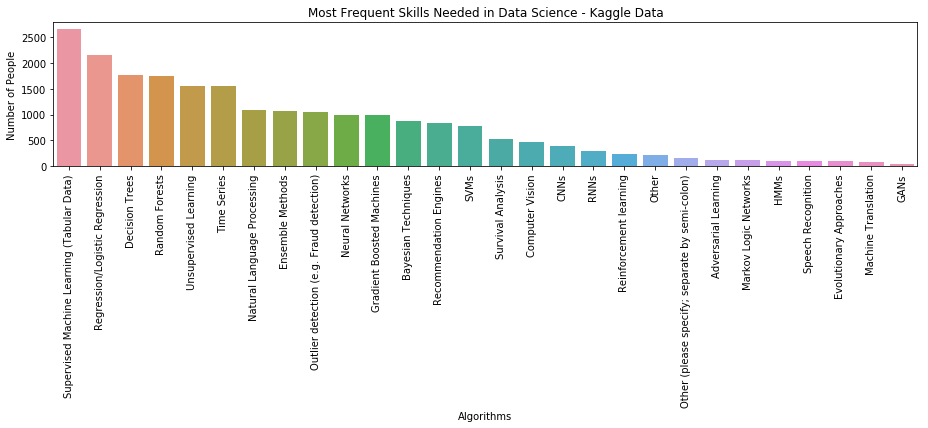

In [9]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Algorithms',y='Number of People',data=Kaggle_Algorithm_DF).set_title('Most Frequent Skills Needed in Data Science - Kaggle Data')
g = sns.barplot(x='Algorithms',y='Number of People',data=Kaggle_Algorithm_DF)
plt.xticks(rotation=90)

###  <font color=blue>  Insights:
from the above plot it is clearly evident that different Machine Learning algorithms (Supervised & Unsupervised), Timeseries Forecasting, Ensemble methods and Neural Networks are few of the most important skills Data Scientists today.

These list of most used Algorithms can be used for designing Curicullum for Data Science course especially while deciding the topics for the student presentations.


### Kaggle Dataset: Which Areas are Data Scientist Working In? 

In [10]:
Industry=Kaggle_Data['EmployerIndustry']

In [11]:
Industry = Industry.dropna()

In [12]:
from collections import Counter
Industry_dict = dict(Counter(Industry))

In [13]:
Industry_DF = pd.DataFrame(list(Industry_dict.items()),columns=['Industry','Number of People'])
Industry_DF.head()

,Industry,Number of People
0,Internet-based,728
1,Mix of fields,954
2,Technology,2253
3,Academic,1643
4,Government,561


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

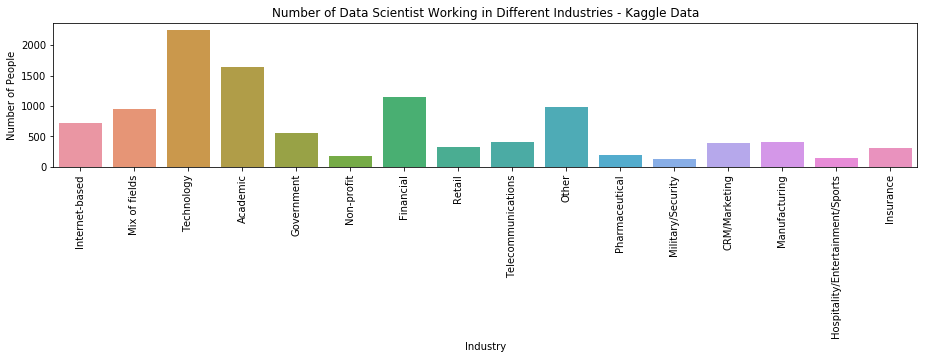

In [14]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Industry',y='Number of People',data=Industry_DF).set_title('Number of Data Scientist Working in Different Industries - Kaggle Data')
g = sns.barplot(x='Industry',y='Number of People',data=Industry_DF)
plt.xticks(rotation=90)


###  <font color=blue>  Insights:

Above plot shows us that most of the Data Scientists are working in Consumer analytics (Marketing + Retail + Manufacturing industries),Technology field and Financial companies. 

This data can be used for customizing the elective courses in Business and Technical Data Science Programs so as to prepare Students accoring to the current needs of the job Market.


### Kaggle Dataset: Which Languages are Data Scientist Working with? 

In [15]:
Language=Kaggle_Data['LanguageRecommendationSelect']

In [16]:
Language = Language.dropna()

In [17]:
Language_dict = dict(Counter(Language))

In [18]:
Language_DF = pd.DataFrame(list(Language_dict.items()),columns=['Language','Number of People'])
Language_DF.head()

,Language,Number of People
0,F#,4
1,Python,6941
2,R,2643
3,SQL,385
4,Java,138


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

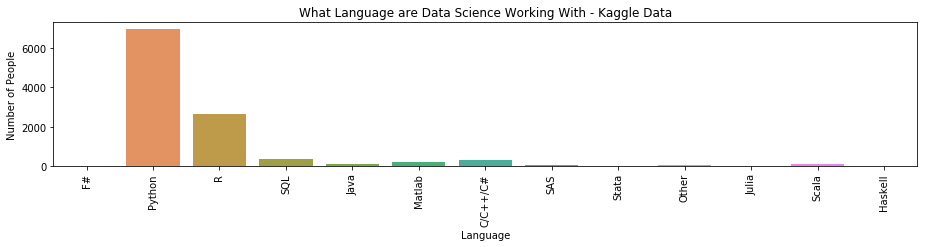

In [19]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Language',y='Number of People',data=Language_DF).set_title('What Language are Data Science Working With - Kaggle Data')
g = sns.barplot(x='Language',y='Number of People',data=Language_DF)
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:
 
 This shows the popularity of Python Language and importance of SQL (Database) progaramming skills for Data Scientist. From this data we can suggest that teaching in Python may be advantageous as most of the employees are using it already in the jobs and it is also most asked skill in the Job descriptions which will be discussed in later parts.

## 1.2 Indeed Data Webscrapping

Since Indeed is one of the most used job portal. We webscraped Job postings from indeed for different Data related jobs from 10 differenet cities. After webscraping we extracted different skills that are asked by Employers in the job description so as to get idea about the current skill trends in Data Science Jobs

In [20]:
# import requests
# import bs4
# from bs4 import BeautifulSoup
# import pandas as pd
# import time

# city_set = ['Toronto','Vancouver','Waterloo','New-York','Chicago','San-Fransisco','Boston','Seattle','San-Diego','Atlanta']
# search_set = ['data+scientist', 'data+analyst','data+engineer','business+analyst','data+analytics+manager']
# columns = ['city', 'job_title', 'company_name', 'location', 'summary', 'salary', 'link']
# sample_df = pd.DataFrame(columns = columns)

scraping code:
search term is to be changed for each search. It is not included in a for loop for all search terms, as the 
run time would get too long, but you could wrap the entire code in a for search in search_set:
with search_set = ['data+scientist', 'data+analyst','data+engineer','business+analyst','data+analytics+manager']

In [21]:
search_term = 'data+scientist'
max_results_per_city = 10

# for city in city_set:
#     for start in range(0, max_results_per_city, 20):
#         if city in ['Toronto','Vancouver','Waterloo']: 
#             pagelink = 'http://www.indeed.ca/jobs?q='+search_term+'&l=' + str(city) + '&start=' + str(start)
#         else:
#             pagelink = 'http://www.indeed.com/jobs?q='+search_term+'&l=' + str(city) + '&start=' + str(start)
#         page = requests.get(pagelink)
#         time.sleep(1)  #ensuring at least 1 second between page grabs
#         soup = BeautifulSoup(page.text, 'lxml')
#         for div in soup.find_all(name='div', attrs={'class':'row'}): 
#             #specifying row num for index of job posting in dataframe
#             num = (len(sample_df) + 1) 
#             #creating an empty list to hold the data for each posting
#             job_post = [] 
#             #append city name
#             job_post.append(city) 
#             #grabbing job title
#             for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}):
#                 job_post.append(a['title']) 
#             #grabbing company name
#             company = div.find_all(name='span', attrs={'class':'company'}) 
#             if len(company) > 0: 
#                 for b in company:
#                     job_post.append(b.text.strip()) 
#             else: 
#                 sec_try = div.find_all(name='span', attrs={'class':'result-link-source'})
#                 for span in sec_try:
#                     job_post.append(span.text) 
#             #grabbing location name
#             c = div.findAll('span', attrs={'class': 'location'}) 
#             for span in c: 
#                 job_post.append(span.text) 
#             #grabbing summary text
#             d = div.findAll('span', attrs={'class': 'summary'}) 
#             for span in d:
#                 job_post.append(span.text.strip())
#             #grabbing salary
#             try:
#                 job_post.append(div.find('nobr').text) 
#             except:
#                 try:
#                     div_two = div.find(name='div', attrs={'class':'sjcl'}) 
#                     div_three = div_two.find('div') 
#                     job_post.append(div_three.text.strip())
#                 except:
#                     job_post.append('Nothing_found') 
#             #grabbing page link
#             for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}):
#                 job_post.append('https://www.indeed.com' + a['href']) 
#             #appending list of job post info to dataframe at index num
#             #cannot use postings for the company Indeed itself, as html structure for posting is different
#             if job_post[2] != 'Indeed':
#                 sample_df.loc[num] = job_post

takes all text in job description
starts after the company name
ends at the "save job" line at the bottom of every job post

In [22]:
# newDf = pd.DataFrame(columns = ['title','company','skillText'])
# for i in range(1,len(sample_df)):
#     page = requests.get(sample_df.iloc[i]['link'])
#     tempSoup = BeautifulSoup(page.text, 'lxml')

#     jTitle = tempSoup.find('b',{"class": "jobtitle"}).text
#     jComp = tempSoup.find('span',{"class": "company"}).text
    
#     currSpot = tempSoup.find('span',{"class": "company"})
#     keepText = ''
    
#     while currSpot != 'save job':
#         nextSpot = currSpot.find_next(string=True)
#         keepText = keepText + ' ' + nextSpot
#         currSpot = nextSpot
#     keepText = str.replace(keepText,'\n','')
#     newDf.loc[i] = [jTitle, jComp, keepText]
    
# # lowercase all characters in tweet
# newDf['skillText'] = newDf['skillText'].str.lower()
# newDf.to_csv('indeed_'+search_term+'.csv', encoding='utf-8')

## 1.3 University Data Science Master's Degree Courses Webscrapping

A total of 10 graduate program curriculums were scraped from various educational institution websites. 7 focused on technical data science programs, and 3 focused on management analytics. 


In [23]:
# from bs4 import BeautifulSoup
# import requests
# import pandas as pd
# import csv
# import numpy as np
# import r

### 1.3.1 Northwestern University - M.S. in Analytics

In [24]:
# url_nw = 'http://www.mccormick.northwestern.edu/analytics/curriculum/courses.html'
# html_nw = requests.get(url_nw)
# soup_nw = BeautifulSoup(html_nw.text, 'html.parser')
# soup_nw.prettify()

In [25]:
# def get_description_nw(link):
#     description = []
#     for i in range(0,len(link)):  
#         url = link[i]
#         html = requests.get(url)
#         soup = BeautifulSoup(html.text, 'html.parser')
#         soup.prettify()      
#         for h3 in soup.find_all(text='Description'):
#             description.append(h3.find_next(name='p').text)
#     return description

In [26]:
# def course_nw(soup):
#     courses = []
#     link = []
#     course_link = []
#     course_code=[]
#     course_name=[]
#     course_description = []
#     for table in soup.find_all(name='table', attrs={'id':'course_list'}):
#         for a in table.find_all(name='a'):
#             courses.append(a.text)
#             link.append(a.get('href'))
                      
#     for i in range(0,len(courses)):
#         if i%2 == 0:
#             course_code.append(courses[i])
#             course_link.append('http://www.mccormick.northwestern.edu/analytics/curriculum/'+link[i])
#         else:
#             course_name.append(courses[i])

#     course_description = get_description_nw(course_link) 
#     return course_code, course_name, course_description, course_link

# info_nw = np.array([course_nw(soup_nw)])

In [27]:
# df_nw = pd.DataFrame(np.column_stack([info_nw[0][0],info_nw[0][1],info_nw[0][2]]), columns= ['Course Code','Course Name', 'Course Description'])

In [28]:
# pd.set_option('display.max_colwidth', -1)
# df_nw.head()

### 1.3.2 Stanford University - M.S. in Statistics: Data Science

In [29]:
# url_sf = 'https://statistics.stanford.edu/academics/ms-statistics-data-science'
# html_sf = requests.get(url_sf)
# soup_sf = BeautifulSoup(html_sf.text, 'html.parser')
# soup_sf.prettify()

In [30]:
# def get_description_sf(link):
#     description = []
#     for i in range(0,len(link)):  
#         url = link[i]
#         html = requests.get(url)
#         soup = BeautifulSoup(html.text, 'html.parser')
#         soup.prettify()      
#         for p in soup.find_all(name='p', attrs={'class':'courseblockdesc'}):
#             description.append(p.text.replace('\n',''))
#     return description

In [31]:
# def course_sf(soup):
#     courses = []
#     course_link = []
#     course_code = []
#     course_name = []
#     for tbody in soup.find_all(name='tbody'):
#         for a in tbody.find_all(name='a'):
#             course_code.append(a.text)
#             course_link.append(a.get('href'))
#             course_name.append(soup.find(text=a.text).find_next('td').text)
    
#     course_desc = get_description_sf(course_link)
#     del course_desc[26]
    
#     return course_code, course_name, course_desc, course_link

# info_sf = np.array([course_sf(soup_sf)])

In [32]:
# df_sf = pd.DataFrame(np.column_stack([info_sf[0][0],info_sf[0][1],info_sf[0][2]]), columns= ['Course Code','Course Name', 'Course Description'])
# df_sf.head()

### 1.3.3 UBC - M.S. in Data Science

In [33]:
# url_ubc = 'https://masterdatascience.science.ubc.ca/program/courses'
# html_ubc = requests.get(url_ubc)
# soup_ubc = BeautifulSoup(html_ubc.text, 'html.parser')
# soup_ubc.prettify()

In [34]:
# def course_ubc(soup):
#     courses = []
#     course_desc = []
#     course_name = []
#     for span in soup.find_all(name='span', attrs={'class':'course'} ):
#         course_name.append(span.text)
        
#     for div in soup.find_all(name='div', attrs={'class': 'field field-name-field-course-description field-type-text-long field-label-hidden'}):
#         course_desc.append(div.find('p').text)
        
#     return course_name, course_desc

# info_ubc = np.array([course_ubc(soup_ubc)])

In [35]:
# df_ubc = pd.DataFrame(np.column_stack([info_ubc[0][0],info_ubc[0][1]]), columns= ['Course Name','Course Description'])
# df_ubc.head()

### 1.3.4 Ryerson University - M.Sc in Data Science and Analytics (only core courses)

In [36]:
# url_ry = 'https://www.ryerson.ca/graduate/datascience/courses/'
# html_ry = requests.get(url_ry)
# soup_ry = BeautifulSoup(html_ry.text, 'html.parser')
# soup_ry.prettify()

In [37]:
# def course_ry(soup):
#     course_desc_dummy = []
#     course_desc = []
#     course_name = []
#     course_code = []
#     for div_name in soup.find_all(name='div', attrs={'class':'accordion'}):
#         for div_name_2 in div_name.find_all(name='div', attrs={'class':'header'}):               
#             if bool(re.search(r'\d', div_name_2.text)):     
#                 course_code.append(div_name_2.text[0:6])
#                 course_name.append(div_name_2.text[7:])
#             else:
#                 course_code.append('N/A')
#                 course_name.append(div_name_2.text)
            
#     for div in soup.find_all(name='div', attrs={'class':'parbase uiwAccordion section'}):
#         for div_desc in div.find_all(name='div', attrs={'class':'text'}):
#             for p in div_desc.find_all(name='p'):
#                 course_desc_dummy.append(p.text)
    
#     for i in range(0,len(course_desc_dummy)):
#         if i%2 == 0:
#             course_desc.append(course_desc_dummy[i])
            
#     return course_code, course_name, course_desc

# info_ry = np.array([course_ry(soup_ry)])

In [38]:
# df_ry = pd.DataFrame(np.column_stack([info_ry[0][0],info_ry[0][1],info_ry[0][2]]), columns= ['Course Code','Course Name','Course Description'])
# df_ry.head()

### 1.3.5 Columbia University - M.S. in Data Science

In [39]:
# url_colm = 'http://datascience.columbia.edu/course-inventory#Stat and CS'
# html_colm = requests.get(url_colm)
# soup_colm = BeautifulSoup(html_colm.text, 'html.parser')
# soup_colm.prettify()

In [40]:
# def course_colm(soup):
#     course_desc = []
#     course_name = []
#     course_code = []
#     for div in soup.find_all(name='div', attrs={'class':'course'}):
#         for h in div.find_all(name='h3'):
#             name = h.text.replace('\n', '')
#             name = name.replace('\t', '')
#             if name != '\xa0' and name != '':
#                 course_name.append(name)
#         for p2 in div.find_all(name='p'):
#             if len(p2.text.split())>15:  
#                 if 'Prerequisites' not in p2.text:
#                     desc = p2.text.replace('\n', '')
#                     desc = desc.replace('\t', '')
#                     course_desc.append(desc)

#     return course_name, course_desc

# info_colm = np.array([course_colm(soup_colm)])

In [41]:
# df_colm = pd.DataFrame(np.column_stack([info_colm[0][0],info_colm[0][1]]), columns= ['Course Name','Course Description'])
# df_colm.head()

### 1.3.6 University of Washington - M.S. in Data Science

In [42]:
# url_uw = 'https://www.datasciencemasters.uw.edu/program-details/courses-curriculum/course-descriptions/'
# html_uw = requests.get(url_uw)
# soup_uw = BeautifulSoup(html_uw.text, 'html.parser')
# soup_uw.prettify()

In [43]:
# def course_uw(soup):
#     course_desc = []
#     course_name = []
#     course_code = []  
#     info = []
    
#     for div in soup.find_all(name='div', attrs={'id':'main_content'}):
#         raw = div.text.split('\n')
#         for item in raw:
#             if 'Credits' not in item and item !='Course Descriptions' and item != '':
#                 info.append(item)
                
#         for i in range(0,len(info)):
#             if i%2 == 0:
#                 name = info[i].split(':')
#                 course_code.append(name[0])
#                 course_name.append(name[1])
#             else:
#                 course_desc.append(info[i])

    
#     return course_code, course_name, course_desc

# info_uw = np.array([course_uw(soup_uw)])

In [44]:
# df_uw = pd.DataFrame(np.column_stack([info_uw[0][0],info_uw[0][1],info_uw[0][2]]), columns= ['Course Code', 'Course Name','Course Description'])
# df_uw.head()

### 1.3.7 Texas A&M University - M.S. in Analytics

In [45]:
# url_am = 'https://analytics.stat.tamu.edu/for-students-2/'
# html_am = requests.get(url_am)
# soup_am = BeautifulSoup(html_am.text, 'html.parser')
# soup_am.prettify()

In [46]:
# def course_am(soup):
#     course_desc = []
#     course_name=[]
#     course_code = []

#     for h in soup.find_all(name='h4', attrs={'class':'wpsm_panel-title'}):
#         name = h.text.replace('\t','')
#         name = re.sub(r'\(.*?\)', '', name) 
#         name = name.replace('\n','')
#         if '**' not in name:
#             if bool(re.search(r'\d', name)):     
#                 course_code.append(name[0:9])
#                 course_name.append(name[10:])
#             else:
#                 course_code.append('N/A')
#                 course_name.append(name)

#     for div in soup.find_all(name='div', attrs={'class':'wpsm_panel-body'}):
#         text = []
#         for he in div.find_all(name='h4'):
#             desc = he.text.replace('\xa0','')
#             if '**' not in desc and 'ISTM 601 Fund' not in desc and 'FINC 649' not in desc and desc !='':
#                 desc_2 = desc
#                 text.append(desc_2)
                
#         if len(text)<2:
#             course_desc.append(desc_2)
#         else: 
#             joint = ' '.join(text)
#             if '9. Applications The ISTM' not in joint:
#                 course_desc.append(joint)
        
#     return course_code, course_name,course_desc

# info_am = np.array([course_am(soup_am)])

In [47]:
# df_am = pd.DataFrame(np.column_stack([info_am[0][0],info_am[0][1],info_am[0][2]]), columns= ['Course Code','Course Name','Course Description'])
# df_am.head()

### 1.3.8 (Business) Queen's University - Master of Management Analytics

In [48]:
# url_queens = 'https://smith.queensu.ca/grad_studies/mma/program_structure_and_content/curriculum.php'
# html_queens = requests.get(url_queens)
# soup_queens = BeautifulSoup(html_queens.text, 'html.parser')
# soup_queens.prettify()

In [49]:
# def course_queens(soup):
#     courses = []
#     course_desc = []
#     course_name=[]
#     for div in soup.find_all(name='div', attrs={'class':'reveal-modal'} ):
#         course_name.append(div.find('h2').text)
#         course_desc.append(div.find('p').text)
        
#     return course_name, course_desc

# info_queens = np.array([course_queens(soup_queens)])

In [50]:
# df_queens = pd.DataFrame(np.column_stack([info_queens[0][0],info_queens[0][1]]), columns= ['Course Name','Course Description'])
# df_queens.head()

###  1.3.9 (Business) McGill University - Master of Management Analytics

In [51]:
# url_mcgill = 'https://www.mcgill.ca/desautels/programs/mma/program-structure'
# html_mcgill = requests.get(url_mcgill)
# soup_mcgill = BeautifulSoup(html_mcgill.text, 'html.parser')
# soup_mcgill.prettify()

In [52]:
# def course_mcgill(soup):
#     course_desc = []
#     course_name=[]
#     course_code=[]
#     for div in soup.find_all(name='div', attrs={'class':'field-item even'}):
#         for a in div.find_all(name='a'):
#             text = a.text.split('-')
#             if len(text) == 2:
#                 course_code.append(text[0])
#                 course_name.append(text[1])
#                 course_desc.append(a.get('title'))
                
#     return course_code, course_name, course_desc

# info_mcgill = np.array([course_mcgill(soup_mcgill)])

In [53]:
# df_mcgill = pd.DataFrame(np.column_stack([info_mcgill[0][0],info_mcgill[0][1],info_mcgill[0][2]]), columns= ['Course Code','Course Name','Course Description'])
# df_mcgill.head()

### 1.3.10 (Business)  Arizona State University - M.S. in Business Analytics

In [54]:
# url_asu = 'https://wpcarey.asu.edu/masters-programs/business-analytics/curriculum'
# html_asu = requests.get(url_asu)
# soup_asu = BeautifulSoup(html_asu.text, 'html.parser')
# soup_asu.prettify()

In [55]:
# def course_asu(soup):
#     course_desc = []
#     course_name=[]
#     for div_name in soup.find_all(name='div', attrs={'class':'panel-heading'}):
#         course_name.append(div_name.text.replace('\n',''))
    
#     for div_desc in soup.find_all(name='div', attrs={'class':'panel-body'}):
#         text = []
#         for p in div_desc.find_all(name='p'):
#             if 'NOTE' not in p.text:
#                 text_2 = p.text.replace('\n','')
#                 text.append(text_2)
                
#         if len(text)<2:
#             course_desc.append(text_2)
#         else: 
#             joint = ' '.join(text)
#             course_desc.append(joint)
            
                
#     return course_name, course_desc

# info_asu = np.array([course_asu(soup_asu)])

In [56]:
# df_asu = pd.DataFrame(np.column_stack([info_asu[0][0],info_asu[0][1]]), columns= ['Course Name','Course Description'])
# df_asu.head()

# 2. Data Processing & Analysis

###   <font color=green> Identifying Skillsets from the Course Description and Job Description using Advanced NLP:

Traditional way to identify skills from job and course descriptions is by doing lookup into each descrition by using python string search to find the skills present in the document from already predefined list of skillset words.

#### Advantages:

1. Reliable if the list of words used for search is universal list (containing all possible words in the document)
2. Faster and Easier way to do lookup when having massive datasets

#### Disadvantages:
 
 1. List we are providing should contain all possible skills that can be mentioned in Job description
 2. Can be used only for Preprocessed texts (After cleaning)
 3. Cannot identify new set of important skills which are not in the mentioned the predefined list

###   <font color=green> Using IBM Watson advanced NLP techniques:

IBM watson Natural Language understanding platform analyzes the unstructured texts to extract meta-data from content such as concepts, entities, keywords, categories etc. This helps us to get better insights from the data when compared to the traditional way.

#### Advantages:

1. It can identify skills from either plain text, HTML, or a public URL - which magnifies our scope of data
2. Watson service can be trained in  Knowledge studio which helps to model custom entities based on business use
3. Since the serach of skills is not rule based, so it helps us to identify new set of skills which we previously didnt model (Watson identifies this by finding the right context and patterns in grammatic usage of words for that particular entities

Eg: Suppose if we train model to identify Python and R as languages, then when a new laguage like Julia if present in the same context then watson can identify this eventhough we didnt mention that previously

#### Disadvantages:
1. Difficult and time consuming to build a custom model to identify the entities required
2. Prediction level depends uopon the accuracy of the model built

Since Watson NLU service helps us to provide better insights from the data and can provides us a platform to build models on cloud we decided to use this for generating custom entities like skillsets from the job descritions

#### Watson Services used:
    1. Watson Natural Language Understanding (To call API)
    2. Watson Knowledge studio (To build the model for predicting skills)
  <font color=blue> || After Training and Building the Model in Watson an Accuracy of 95% is observed during Model Evaluation ||    
 <font color=blue> || More Details about Training and Evaluation of Model are discussed at the end of Notebook ||

In [57]:
# IBM Watson API Credentials
nlu = NaturalLanguageUnderstandingV1(
  username='ad955d96-871e-4333-a9a7-f94d8321c11c',
  password='ZZTW1Zf0Du5Q',
  version='2017-02-27')

In [58]:
# Function to Extract differenet Skills
def extract_entities(entities):
    
    tech_skills = []
    soft_skills = []
    coding_skills = []

    for index, row in entities.iterrows():
        if row['type'] == 'Technical_skills':
            tech_skills.append(row['text'])
        elif row['type'] == 'Soft_skills':
            soft_skills.append(row['text'])
        elif row['type'] == 'Coding_skills':
            coding_skills.append(row['text'])
    
    return tech_skills, soft_skills, coding_skills
    

In [59]:
# Converting the response JSON format to Dataframe
def extract_data(response):
    keywords = []
    concepts = []
    
    keyword_df = json_normalize(response['keywords'])
    for index_key, row_key in keyword_df.iterrows():
        keywords.append(row_key['text'])
        
    concept_df = json_normalize(response['concepts'])
    for index_con, row_con in concept_df.iterrows():
        concepts.append(row_con['text'])
        
    entities = json_normalize(response['entities'])
    tech_skills = extract_entities(entities)[0]
    soft_skills = extract_entities(entities)[1]
    coding_skills = extract_entities(entities)[2]
    
    return keywords, concepts, tech_skills, soft_skills, coding_skills

## 2.1 Course Descriptions Processing for Skillset Identification:

In [60]:
# Calling the API
def get_responses_course(df_tech_course):
    responses = []
    for index, row in df_tech_course.iterrows():
        a = row['Course Description']
        response = nlu.analyze(
          text = a,
          features=Features(
            entities=EntitiesOptions(
            model = '10:92a16df7-4a68-4b07-a9dc-aca604a1fb34',limit=100),
            concepts=ConceptsOptions(limit=50),
            keywords=KeywordsOptions(limit=100)))

        responses.append(response)
    return responses

#### Import .csv files containing courses information

In [61]:
# All API calls are commentedout and they are downloaded as CSV files after getting response which are again read back here.
df_tech_course = pd.DataFrame.from_csv('course_info_tech.csv', encoding='ISO-8859-1')
df_bz_course = pd.DataFrame.from_csv('course_info_bz.csv', encoding='ISO-8859-1')

In [62]:
pd.set_option('display.max_colwidth', -1)
df_tech_course.head()

,Course Name,Course Description
0,NUvention Analytics,"NUvention: AnalyticsåÊis a unique interdisciplinary course being designed to create opportunities for students to create new analytics technologies and then build businesses around their innovations. This one-quarter class is conceived by students within the Engineering, Business, Law, Communications and other schools across campus along with the assistance of an Advisory board and the Farley Center for Entrepreneurship and Innovation. The course is built around projects, so an advisory board will keep track of the projects, giving its expert advice in order to ensure a proper product-market alignment."
1,Computer Simulation for Risk and Operations Analysis,"This is a hands-on course on computer simulation of business, service, and manufacturing systems that are subject to uncertainty or risk. Spreadsheet simulation using @Risk and system simulation using Arena will be covered. Upon completion of the course students will be able to develop complex simulation models, design the simulation experiment to be run on the model, and analyze and interpret the results. Managing simulation projects is also addressed."
2,Everything Starts with Data,This course provides aåÊfundamentalåÊpractical coverage of analytics. The focus of the course is to expose you to challenges and opportunities in analytics through a couple of projects. We will be using the tools that you learned in the boot camp. The majority of the material and lecturing will be computer based.åÊ
3,Predictive Analytics I,"This course covers linear parametric methods of regression and classification. They include multiple regression, binary logistic regression, multinomial (nominal and ordinal) logistic regression, discriminant analysis and generalized linear models. R software is used to apply the methods to real data sets. A large data analysis group project required."
4,Business Communication & Analytics Consulting,"In this class, we examine project management, business communication, and client interaction best practices that support the MSiA practicum and capstone projects. Special emphasis is given to translating or relating the analytical output of projects to the vocabulary and expectations of business functions in marketing, operations, and finance. We examine the best practices in managing client / employer expectations in the analytical environment. This provides students with the tools to successfully navigate the challenges of leading analytical projects while developing top-notch client-facing skills for their careers."


In [63]:
df_bz_course.head()

,Course Name,Course Description
0,Creating High Performance Teams,"Creating, leading or contributing to a high performance team are critical skills for managers today. This introductory module helps you build an understanding of the key elements of a high performance team, and what leads to team effectiveness. During the module, students are led through a set of practical sessions that reveal a five-step process for building high performance teams. The knowledge gained and the skill set developed are immediately transferable to the work place."
1,Predictive Modelling,"The course will combine three key elements: analytics techniques, business applications, and basic coding/programming with emphasis on applications to various business cases. The course will cover 2 major topics within the domain of predictive analytics: âpredicting quantitiesâ and âpredicting eventsâ. Within the âquantitiesâ part we will focus on linear models, variable selection and regularizations, as well as on time-series analyses. Within the âeventsâ part we will focus on generalized linear models (logistic regression) and get an introduction to supervised machine learning (CART, random forest, boosting, and neural networks)."
2,Machine Learning & Artificial Intelligence,"This course will introduce machine learning (ML) concepts, with a heavy focus on business applications. The course will look in-depth at all three types of ML: supervised (including classification and deep learning), unsupervised (including association rule learning and dimensionality reduction), and reinforcement learning. The course will survey key technologies and applications that are driving the ML revolution. The course will include some theoretical background, but will be application-focused. The overall goal of the course is to provide a foundation and framework for understanding how to use machine learning models in data-driven decision making."
3,Introduction to Management,"This course introduces the main functional areas of business, including strategy, marketing, operations and finance, and demonstrates how these areas interact to produce and market products and/or services effectively and efficiently. It provides an overview of the modern corporate enterprise in Canadian and international contexts, and of the tasks, practices, and responsibilities of its managers."
4,Introduction to Analytical Modeling,"The course will establish a foundation of statistical modelling techniques to be immediately useful for analysis and to provide a foundation for more advanced material studied throughout the program. Topics will include data types, random numbers, probability models, hypothesis testing and statistical inference, and a thorough grounding in simple and multiple regression. The course is designed to ensure that all students, regardless of background or experience, are proficient in the use and application of a variety of statistical methods."


In [64]:
# responses = get_responses_course(df_tech_course)
# responses_bz = get_responses_course(df_bz_course)

In [65]:
# function to get responses of Course skills by using API's
def get_all_course_info_tech(responses):
    keywords = []
    concepts = []
    tech_skills = []
    soft_skills = []
    coding_skills = []
    
    for response in responses:
        data = extract_data(response)
        keywords.append(data[0])
        concepts.append(data[1])
        tech_skills.append(data[2])
        soft_skills.append(data[3])
        coding_skills.append(data[4])
    
    return keywords, concepts, tech_skills, soft_skills, coding_skills

In [66]:
# course_info_tech = np.array([get_all_course_info_tech(responses)])
# course_info_bz = np.array([get_all_course_info_tech(responses_bz)])

In [67]:
# course_info_tech_df = pd.DataFrame(np.column_stack([df_tech_course['Course Name'],df_tech_course['Course Description'],course_info_tech[0][0],course_info_tech[0][1],course_info_tech[0][2],course_info_tech[0][3],course_info_tech[0][4]]), columns= ['Course Name','Course Description','Keywords','Concepts','Technical Skills','Soft Skills','Coding Skills'])
# course_info_bz_df = pd.DataFrame(np.column_stack([df_bz_course['Course Name'],df_bz_course['Course Description'], course_info_bz[0][0],course_info_bz[0][1],course_info_bz[0][2],course_info_bz[0][3],course_info_bz[0][4]]), columns= ['Course Name','Course Description','Keywords','Concepts','Technical Skills','Soft Skills','Coding Skills'])

In [68]:
# course_info_tech_df.to_csv('PROCESSED_COURSE_TECH.csv')

In [69]:
# course_info_bz_df.to_csv('PROCESSED_COURSE_BZ.csv')

|| It can be observed that We got responses as three different skills(Technical, Coding & soft SKills) which can be used to draw different insights ||

In [70]:
course_info_tech_df = pd.read_csv('PROCESSED_COURSE_TECH.csv',encoding='ISO-8859-1',converters = {
        'Soft Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Technical Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Coding Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(",")
        })           
course_info_tech_df.head()

,Unnamed: 0,Course Name,Course Description,Keywords,Concepts,Technical Skills,Soft Skills,Coding Skills
0,0,NUvention Analytics,"NUvention: AnalyticsÃ¥Ãis a unique interdisciplinary course being designed to create opportunities for students to create new analytics technologies and then build businesses around their innovations. This one-quarter class is conceived by students within the Engineering, Business, Law, Communications and other schools across campus along with the assistance of an Advisory board and the Farley Center for Entrepreneurship and Innovation. The course is built around projects, so an advisory board will keep track of the projects, giving its expert advice in order to ensure a proper product-market alignment.","['new analytics technologies', 'unique interdisciplinary course', 'proper product-market alignment', 'advisory board', 'one-quarter class', 'Farley Center', 'expert advice']","['Entrepreneurship', 'Innovation', 'Real estate', 'Technology', 'Business', 'Joseph Schumpeter', 'Design', 'Education', 'Invention', 'Creativity', 'Corporation', 'Economic growth', 'Economics', 'Engineering', 'Creative problem solving', 'Advice', 'Management']",[],[],[]
1,1,Computer Simulation for Risk and Operations Analysis,"This is a hands-on course on computer simulation of business, service, and manufacturing systems that are subject to uncertainty or risk. Spreadsheet simulation using @Risk and system simulation using Arena will be covered. Upon completion of the course students will be able to develop complex simulation models, design the simulation experiment to be run on the model, and analyze and interpret the results. Managing simulation projects is also addressed.","['complex simulation models', 'hands-on course', 'Spreadsheet simulation', 'simulation experiment', 'simulation projects', 'uncertainty', 'risk', 'completion', 'analyze', 'Arena', 'business', 'service', 'systems', 'students', 'design']","['Computer graphics', 'Computer simulation', 'Operations research', 'Management', 'Systems engineering', 'Risk management', 'System']","[simulation, simulation, simulation, simulation, simulation, simulation]",[],[]
2,2,Everything Starts with Data,This course provides aÃ¥ÃfundamentalÃ¥Ãpractical coverage of analytics. The focus of the course is to expose you to challenges and opportunities in analytics through a couple of projects. We will be using the tools that you learned in the boot camp. The majority of the material and lecturing will be computer based.Ã¥Ã,"['boot camp', 'aÃ¥ÃfundamentalÃ¥Ãpractical coverage', 'analytics', 'lecturing', 'majority', 'couple', 'challenges', 'course', 'focus', 'opportunities', 'projects', 'tools', 'material']","['Mac OS X', 'Focus']",[],[],[]
3,3,Predictive Analytics I,"This course covers linear parametric methods of regression and classification. They include multiple regression, binary logistic regression, multinomial (nominal and ordinal) logistic regression, discriminant analysis and generalized linear models. R software is used to apply the methods to real data sets. A large data analysis group project required.","['binary logistic regression', 'linear parametric methods', 'generalized linear models', 'multiple regression', 'analysis group project', 'real data sets', 'discriminant analysis']","['Regression analysis', 'Logistic regression', 'Generalized linear model', 'Linear regression', 'Econometrics', 'Logit', 'Multivariate adaptive regression splines', 'Ordinary least squares', 'Multinomial logit', 'Censored regression model', 'Georg Cantor', 'Statistics', 'Errors and residuals in statistics', 'Parametric statistics', 'Iteratively reweighted least squares', 'Probit model', 'Segmented regression', 'Forecasting', 'Statistical inference', '0', 'Multiplication', 'Natural number']","[regression, regression, regression, regression]",[],[R]
4,4,Business Communication & Analytics Consulting,"In this class, we examine project management, business communication, and client interact

In [71]:
course_info_bz_df = pd.read_csv('PROCESSED_COURSE_BZ.csv',encoding='ISO-8859-1',converters = {
        'Soft Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Technical Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Coding Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(",")
        })           
course_info_bz_df.head()

,Unnamed: 0,Course Name,Course Description,Keywords,Concepts,Technical Skills,Soft Skills,Coding Skills
0,0,Creating High Performance Teams,"Creating, leading or contributing to a high performance team are critical skills for managers today. This introductory module helps you build an understanding of the key elements of a high performance team, and what leads to team effectiveness. During the module, students are led through a set of practical sessions that reveal a five-step process for building high performance teams. The knowledge gained and the skill set developed are immediately transferable to the work place.","['high performance team', 'high performance teams', 'introductory module', 'five-step process', 'critical skills', 'key elements', 'practical sessions', 'work place', 'effectiveness', 'managers', 'understanding', 'students', 'knowledge']","['Leadership', 'Skill', 'Learning', 'Management', 'Critical thinking']",[],"[team, team, team]",[]
1,1,Predictive Modelling,"The course will combine three key elements: analytics techniques, business applications, and basic coding/programming with emphasis on applications to various business cases. The course will cover 2 major topics within the domain of predictive analytics: Ã¢ÂÂpredicting quantitiesÃ¢ÂÂ and Ã¢ÂÂpredicting eventsÃ¢ÂÂ. Within the Ã¢ÂÂquantitiesÃ¢ÂÂ part we will focus on linear models, variable selection and regularizations, as well as on time-series analyses. Within the Ã¢ÂÂeventsÃ¢ÂÂ part we will focus on generalized linear models (logistic regression) and get an introduction to supervised machine learning (CART, random forest, boosting, and neural networks).","['generalized linear models', 'various business cases', 'analytics techniques', 'predictive analytics', 'time-series analyses', 'logistic regression', 'key elements', 'basic coding/programming', 'supervised machine', 'variable selection', 'major topics', 'business applications', 'neural networks', 'random forest', 'course']","['Regression analysis', 'Machine learning', 'Supervised learning', 'Neural network', 'Predictive analytics', 'Logistic regression', 'Generalized linear model', 'Artificial neural network', 'Logit', 'Linear regression', 'Logistic function', 'Scientific method', 'Statistical classification', 'Statistics', 'Business intelligence', 'Econometrics', 'Forecasting', 'Probit model', 'Algorithm', 'The Domain, Sydney', 'Debut albums', 'Learning', 'Business case']","[programming, regression, supervised, machinelearning]",[],[]
2,2,Machine Learning & Artificial Intelligence,"This course will introduce machine learning (ML) concepts, with a heavy focus on business applications. The course will look in-depth at all three types of ML: supervised (including classification and deep learning), unsupervised (including association rule learning and dimensionality reduction), and reinforcement learning. The course will survey key technologies and applications that are driving the ML revolution. The course will include some theoretical background, but will be application-focused. The overall goal of the course is to provide a foundation and framework for understanding how to use machine learning models in data-driven decision making.","['data-driven decision making', 'association rule learning', 'ML revolution', 'dimensionality reduction', 'heavy focus', 'business applications', 'theoretical background', 'overall goal', 'reinforcement learning', 'key technologies', 'deep learning', 'course', 'machine', 'concepts', 'types', 'classification', 'foundation', 'framework']","['Machine learning', 'Cognition', 'Reinforcement learning', 'Decision making', 'Rulemaking', 'Decision theory', 'Heavy metal music', 'Association rule learning']","[machinelearning, supervised, deeplearning, unsupervised, machinelearning]",[],[]
3,3,Introduction to Management,"This course introduces the main functional areas of business, including strategy, marketing, operations and finance, and demonstrates how these area

## 2.2 Job Descriptions Processing for Skillset Identification:

In [72]:
# Calling API for Job descriptions
def get_responses_job(df_tech_course):
    responses = []
    for index, row in df_tech_course.iterrows():
        a = row['skillText']
        response = nlu.analyze(
          text = a,
          features=Features(
            entities=EntitiesOptions(
            model = '10:92a16df7-4a68-4b07-a9dc-aca604a1fb34',limit=100),
            concepts=ConceptsOptions(limit=50),
            keywords=KeywordsOptions(limit=100)))

        responses.append(response)
    return responses

In [73]:
def return_job_skills(df_descp):
    responses_job = get_responses_job(df_descp)
    job_info = np.array([get_all_course_info_tech(responses_job)])
    df_job_skills = pd.DataFrame(np.column_stack([df_descp['title'],df_descp['company'],job_info[0][0],job_info[0][1],job_info[0][2],job_info[0][3],job_info[0][4]]), columns= ['Job Title','Company','Keywords','Concepts','Technical Skills','Soft Skills','Coding Skills'])
    
    return df_job_skills

### Process Technical Data Science Jobs Data

--- Tehcnical data science jobs are scrapped from indeed.com, including searches for 'data science', 'data science analyst' and 'data science engineer'

--- For Designing Technical Data Science Masters Program, all the above mentioned three technical Jobs are used for drawing insights and making final course predictions.

#### Read data science search results

In [74]:
# df_data_sci_descp = pd.DataFrame.from_csv('indeed_data_sci.csv')
# df_data_eng_descp = pd.DataFrame.from_csv('indeed_data_eng.csv')
# df_data_alyst_descp = pd.DataFrame.from_csv('indeed_data_analyst.csv')

#### Extract skills from job descriptions using IBM Watson NLU

In [75]:
# df_data_sci = return_job_skills(df_data_sci_descp)
# df_data_sci.head()

In [76]:
# df_data_eng = return_job_skills(df_data_eng_descp)
# df_data_eng.head()

In [77]:
# df_data_alyst = return_job_skills(df_data_alyst_descp)
# df_data_alyst.head()

#### Webscrapping Stackoverflow jobs:

To consider a completely different sample of Jobs Data, Stackoverflow is scraped and jobs are used for Analysis so as to add new set of Data points compared to regular Indeed Job Postings.

In [78]:
url = 'https://stackoverflow.com/jobs?sort=i&q=data+science'
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')
soup.prettify()

def get_pages(soup):
    links = []
    for a_job in soup.find_all(name='a', attrs={'class':'job-link'}):
        text = a_job.get('title')
        if text != None:
            if 'page' in text:
                links.append('https://stackoverflow.com'+a_job.get('href'))
    return links


def job(soup):
    job_title = []
    company = []
    skills = []
    
    for a_job in soup.find_all(name='a', attrs={'class':'job-link'}):
        text = a_job.get('title')
        if text != None:
            if 'page' not in text:
                job_title.append(text)
    
    for div_company in soup.find_all(name='div', attrs={'class':'-company g-row'}):
        for div_name in div_company.find_all(name='div', attrs={'class':'-name'}):
            company_name = div_name.text.replace('\r','')
            company_name = company_name.replace('\n','')
            company.append(company_name)

    for div_tag in soup.find_all(name='div', attrs={'class':'-tags g-row'}):
        skill_tag = []
        for a in div_tag.find_all(name='a', attrs={'class':'post-tag job-link no-tag-menu'}):
            skill_tag.append(a.text)
        skills.append(skill_tag)   
                           
    return job_title, company, skills

job_title=[]
company = []
skills = []

for page in get_pages(soup):
    job_list = []
    html = requests.get(page)
    soup = BeautifulSoup(html.text, 'html.parser')
    soup.prettify()
    
    job_list = job(soup)
    job_title = job_title + job_list[0]
    company = company + job_list[1]
    skills = skills + job_list[2]
    
df_jobs_stk = pd.DataFrame(np.column_stack([job_title,company,skills]), columns= ['Job Title','Company','Skills'])

empty = []
random = []
for i in range(0,len(df_jobs_stk['Skills'])):
    empty.append(random)
    
empty_entry = pd.Series(empty)

stack_jobs = pd.DataFrame(np.column_stack([df_jobs_stk['Job Title'],df_jobs_stk['Company'], empty_entry, empty_entry, empty_entry, empty_entry, df_jobs_stk['Skills']]), columns= ['Job Title','Company','Keywords','Concepts','Technical Skills','Soft Skills','Coding Skills'])

In [79]:
stack_jobs.head()

,Job Title,Company,Keywords,Concepts,Technical Skills,Soft Skills,Coding Skills
0,Junior Data Analyst in Online Gaming and Marketing (m/f),Goodgame Studios,[],[],[],[],"[r, python, sql, data, sysadmin]"
1,Java Backend Engineer - Streaming Platform,King,[],[],[],[],"[java, java-stream, hadoop, unix, concurrency]"
2,C# Developer - help reimagine healthcare,"IQVIA™, The Human Data Science Company™",[],[],[],[],"[agile, c#, javascript]"
3,Senior Big Data Architect,GameDuell,[],[],[],[],"[hadoop, apache-kafka, apache-storm, apache-spark, cloud]"
4,Data Engineer - who can engineer data!,BJSS,[],[],[],[],"[cloud, hadoop, java, scala, python]"


In [80]:
# frames_tech = [df_data_sci, df_data_eng, df_data_alyst, stack_jobs]
# job_tech_info_df = pd.concat(frames_tech)

### **********************************

In [81]:
job_tech_info_df = pd.read_csv('TECH_JOB_PROCESSED.csv',encoding='ISO-8859-1',converters = {
        'Soft Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Technical Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Coding Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(",")
        })           
job_tech_info_df.shape


(2969, 8)

In [82]:
job_bz_info_df = pd.read_csv('BZ_JOB_PROCESSED.csv',encoding='ISO-8859-1',converters = {
        'Soft Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Technical Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Coding Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(",")
        })           
job_bz_info_df.shape

(1101, 8)

### Process Business Data Science Jobs Data

Business Jobs considered = business analyst + data science manager

--- For Designing Business Data Science Masters Program, the above mentioned two Business Data Jobs are used for drawing insights and making final Business course predictions.

In [83]:
# df_bz_alyst_descp = pd.DataFrame.from_csv('indeed_business_analyst.csv')
# df_data_mgr_descp = pd.DataFrame.from_csv('indeed_data_mgr.csv')

In [84]:
# df_bz_alyst = return_job_skills(df_bz_alyst_descp)
# df_bz_alyst.head()

In [85]:
# df_data_mgr = return_job_skills(df_data_mgr_descp)
# df_data_mgr.head()

In [86]:
# frames_bz = [df_bz_alyst, df_data_mgr]
# job_bz_info_df = pd.concat(frames_bz)

In [87]:
# job_bz_info_df

### Find Skill Frequency and Reference Score

Finding frequency of each type of skill in different jobs to get insights about the job market requirements.

In [88]:
def get_tech_freq(job_df):
# returns a dataframe that contains technical skills and their corresponding frequency
    skills = []
    for index, row in job_df.iterrows():
        skills = skills + row['Technical Skills']

    new_skills = list(filter(None, skills)) # filter out empty entries
    result_job_tech = pd.Series(new_skills).value_counts()
    job_tech_dict = result_job_tech.to_dict()
    job_tech_df = pd.DataFrame(list(job_tech_dict.items()),columns=['Technical Skills', 'Frequency'])

    return job_tech_df

In [89]:
def get_coding_freq(job_df):
# returns a dataframe that contains technical skills and their corresponding frequency
    skills = []
    for index, row in job_df.iterrows():
        skills = skills + row['Coding Skills']
    
    new_skills = list(filter(None, skills)) # filter out empty entries
    result_job_coding = pd.Series(new_skills).value_counts()
    job_coding_dict = result_job_coding.to_dict()
    job_coding_df = pd.DataFrame(list(job_coding_dict.items()),columns=['Coding Skills', 'Frequency'])
    
    return job_coding_df

In [90]:
def get_soft_freq(job_df):
# returns a dataframe that contains technical skills and their corresponding frequency
    skills = []
    for index, row in job_df.iterrows():
        skills = skills + row['Soft Skills']
    
    new_skills = list(filter(None, skills)) # filter out empty entries
    result_job_soft = pd.Series(new_skills).value_counts()
    job_soft_dict = result_job_soft.to_dict()
    job_soft_df = pd.DataFrame(list(job_soft_dict.items()),columns=['Soft Skills', 'Frequency'])
    
    return job_soft_df

#### Tech Jobs Freq

In [91]:
job_tech_freq = get_tech_freq(job_tech_info_df)
job_tech_freq.head()

,Technical Skills,Frequency
0,machinelearning,2973
1,bigdata,1374
2,statistics,1311
3,programming,1270
4,database,1044


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

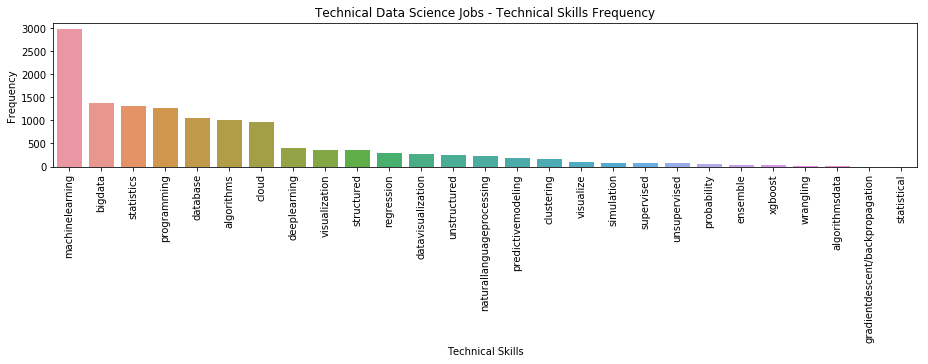

In [92]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Technical Skills',y='Frequency',data=job_tech_freq).set_title('Technical Data Science Jobs - Technical Skills Frequency')
g_techjob_tech = sns.barplot(x='Technical Skills',y='Frequency',data=job_tech_freq)
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:
 
From above barplot we can understand about the major Technical Skills which are required by a Data Scientist. So while designing any course we should make sure that all the most frequently sought technical skills in the Jobs are to be included in the course curriculum.

Main Technical Skills:
1. Machine Learning
2. Big Data
3. Statistics
4. Programming Skills
5. Databases
6. Algorithms
7. Data Visualization
8. Cloud Computing

This Insight is clearly used for designing the current Data Science course curicullum. Since the main goal of the course is to prepare students for a Entry level Data Scientist Job, By learning all these skills that are frequently sought in JOb Market we can increase the Job securing chances in Data Science.

In [93]:
job_coding_freq = get_coding_freq(job_tech_info_df)
job_coding_freq.head(n=10)

,Coding Skills,Frequency
0,python,1943
1,sql,870
2,hadoop,777
3,java,598
4,tableau,412
5,r,344
6,hive,323
7,scala,296
8,spark,268
9,sas,175


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

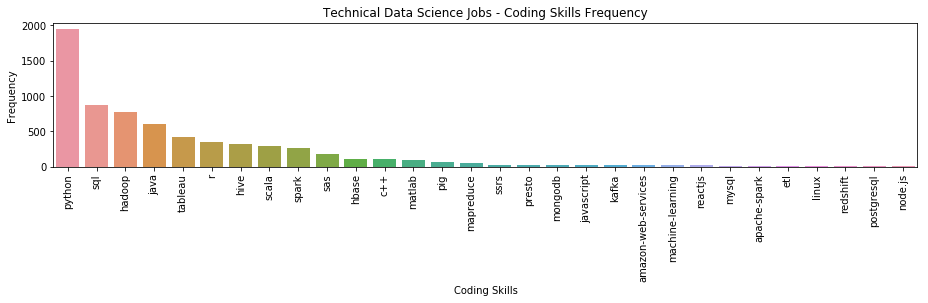

In [94]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Coding Skills',y='Frequency',data=job_coding_freq.head(n=30)).set_title('Technical Data Science Jobs - Coding Skills Frequency')
g_techjob_coding = sns.barplot(x='Coding Skills',y='Frequency',data=job_coding_freq.head(n=30))
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:
    
We can undertstand the importance of Python (Programming lanuage) and SQL(database) from this. By considering this plot and the Kaggle plot discussed previously we can Strongly suggest Python for new Data Science Learners. 

It can be seen that trend is changing from R to Python since many of the JOb descriptions is asking for Python skill than R.

Main Coding Tools:

--Python   (Programming)

--SQL      (Databases)

--Hadoop   (Big Data)

--Tableau  ( Visualization)

These coding tools should be taught in any Data Science Masters program so as to increase the Job selection chances

In [95]:
job_soft_freq = get_soft_freq(job_tech_info_df)
job_soft_freq.head()

,Soft Skills,Frequency
0,team,6854
1,communicate,931
2,creative,653
3,verbal,628
4,passion,579


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

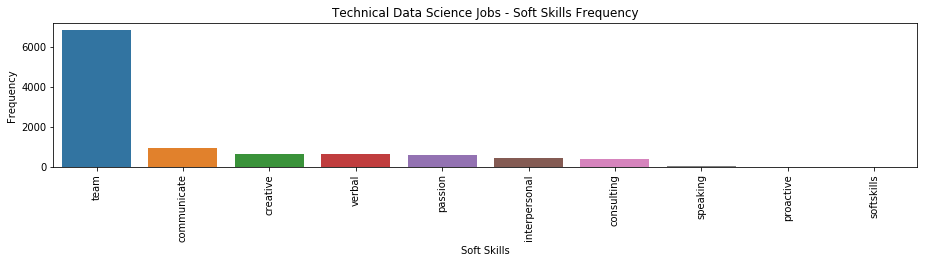

In [96]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Soft Skills',y='Frequency',data=job_soft_freq.head(n=30)).set_title('Technical Data Science Jobs - Soft Skills Frequency')
g_techjob_soft = sns.barplot(x='Soft Skills',y='Frequency',data=job_soft_freq.head(n=30))
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:
 
 Above Data clearly shows the importance of Team workwork and communication for the Data scientists. We can see that there is  significant number of mentions about team and communication in the jobs

#### Business Jobs Freq

In [97]:
bz_job_tech_freq = get_tech_freq(job_bz_info_df)
bz_job_tech_freq.head()

,Technical Skills,Frequency
0,database,319
1,statistics,267
2,bigdata,223
3,cloud,203
4,machinelearning,151


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

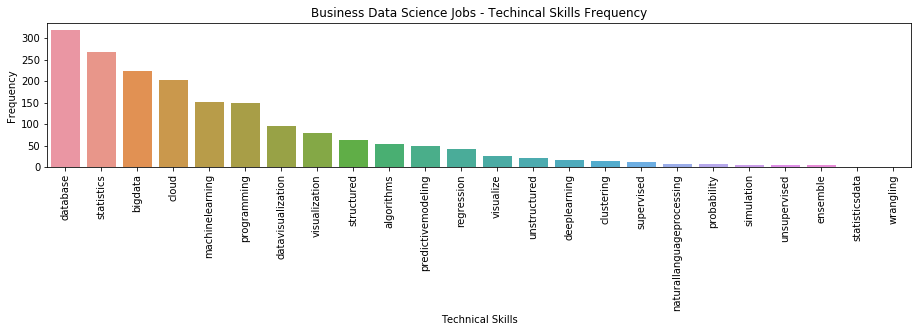

In [98]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Technical Skills',y='Frequency',data=bz_job_tech_freq.head(n=30)).set_title('Business Data Science Jobs - Techincal Skills Frequency')
g_bzjob_tech = sns.barplot(x='Technical Skills',y='Frequency',data=bz_job_tech_freq.head(n=30))
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:

Top Technical SKills for Business Data Science Jobs:
1. Databases
2. Statistics
3. Big Data
4. Cloud Technologies
5. Machine Learning
6. Data Visualization

We can clearly find that for Business Data Science Jobs, More importance should be given on Databases, Big data Technologies and Data Visualizations. These are considered while designing Business Data Science curicullum 

In [99]:
bz_job_coding_freq = get_coding_freq(job_bz_info_df)
bz_job_coding_freq.head()

,Coding Skills,Frequency
0,sql,247
1,tableau,189
2,python,169
3,hadoop,78
4,r,37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

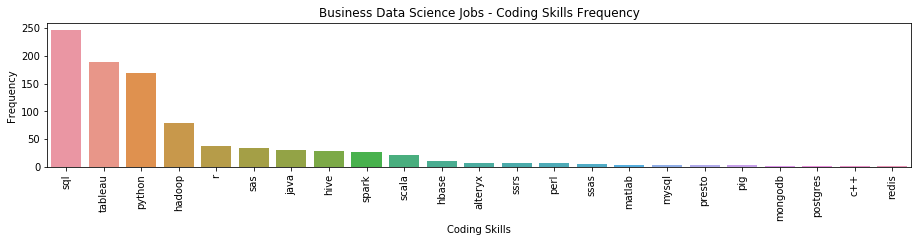

In [100]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Coding Skills',y='Frequency',data=bz_job_coding_freq.head(n=30)).set_title('Business Data Science Jobs - Coding Skills Frequency')
g_bzjob_coding = sns.barplot(x='Coding Skills',y='Frequency',data=bz_job_coding_freq.head(n=30))
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:
 
The Data clearly shows a shift in Coding tools from Python to SQL for Business Data Science related jobs. We Tableau being the second most important Skill, we can understand the importance of Visualizations for Business Data related jobs.
 
 So during Business Data Science course designs, Databases, Data Visualization and cloud technologies are given more prominance for final course selection

In [101]:
bz_job_soft_freq = get_soft_freq(job_bz_info_df)
bz_job_soft_freq.head() 

,Soft Skills,Frequency
0,team,3176
1,communicate,428
2,consulting,349
3,verbal,335
4,creative,223


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

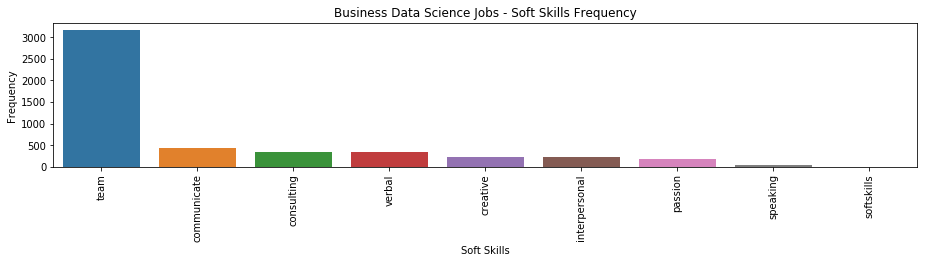

In [102]:
%matplotlib inline
plt.axes([0.1,0.5,2,0.5]) #Assign a plot space in plt
sns.barplot(x='Soft Skills',y='Frequency',data=bz_job_soft_freq.head(n=30)).set_title('Business Data Science Jobs - Soft Skills Frequency')
g_bzjob_soft = sns.barplot(x='Soft Skills',y='Frequency',data=bz_job_soft_freq.head(n=30))
plt.xticks(rotation=90)

 ### <font color=blue>  Insights:
 
Soft skills are almost similar to that observed in Technical Data Science jobs. But being Business related jobs we can identify importance of consulting and strategy techniques from the above plot.
 
Therefore, Courses with consulting and Strategy should be given more importance while making final course selections.

 ### <font color=green> Data Driven Approach for Course Selection: 

Two Methods are used here for finding the final set of right courses for Technical & Business related Data Science courses.

 ####  Method 1: Optimization Technique  -- Solving using Mathematical way

 #### Method 2: Machine Learning -- Neares Neighbours Algorithm

Finally, Both of the methods are compared and final list of courses are seleceted from the calculated scores and predictions

 ### <font color=blue>  1. Solving in Mathematical Way:
 
 
Since we got the frequency of different technical and coding skills from the Indeed Jobs data, they are used for scoring the skills that are taught in each course. Weighing is done by diving the frequency of each skill by total frequency of all skills. By doing weighing scores we can rank the courses based on the final weights. One one with more rank implies that it covers most of the relevant skills that are expected in the job market now. 

### Calculate Weighted Scores for Skills

In [103]:
def calc_ref_score(job_freq_df, skill_name):
# returns a dataframe that contains skills and their corresponding score
    total_freq = sum(job_freq_df['Frequency'])
    scores = []
    for index, skill in job_freq_df.iterrows():
        score = skill['Frequency']/total_freq
        scores.append(score)
    job_score = pd.DataFrame(np.column_stack([job_freq_df[skill_name],scores]), columns= [skill_name,'Score'])
        
        
    return job_score

#### Skills scoring from techinical job descriptions

In [104]:
tech_refscore_tech = calc_ref_score(job_tech_freq,'Technical Skills')
tech_refscore_tech.head()

,Technical Skills,Score
0,machinelearning,0.230376
1,bigdata,0.10647
2,statistics,0.101589
3,programming,0.0984115
4,database,0.0808989


In [105]:
tech_refscore_coding = calc_ref_score(job_coding_freq, 'Coding Skills')
tech_refscore_coding.head()

,Coding Skills,Score
0,python,0.279689
1,sql,0.125234
2,hadoop,0.111847
3,java,0.0860803
4,tableau,0.0593062


In [106]:
tech_refscore_soft = calc_ref_score(job_soft_freq,'Soft Skills')
tech_refscore_soft.head()

,Soft Skills,Score
0,team,0.651211
1,communicate,0.0884561
2,creative,0.0620428
3,verbal,0.0596675
4,passion,0.0550119


#### Skills scoring from business job descriptions

In [107]:
bz_refscore_tech = calc_ref_score(bz_job_tech_freq, 'Technical Skills')
bz_refscore_tech.head()

,Technical Skills,Score
0,database,0.176049
1,statistics,0.147351
2,bigdata,0.123068
3,cloud,0.112031
4,machinelearning,0.0833333


In [108]:
bz_refscore_coding = calc_ref_score(bz_job_coding_freq, 'Coding Skills')
bz_refscore_coding.head()

,Coding Skills,Score
0,sql,0.269357
1,tableau,0.206107
2,python,0.184297
3,hadoop,0.08506
4,r,0.040349


In [109]:
bz_refscore_soft = calc_ref_score(bz_job_soft_freq, 'Soft Skills')
bz_refscore_soft.head()

,Soft Skills,Score
0,team,0.641616
1,communicate,0.0864646
2,consulting,0.0705051
3,verbal,0.0676768
4,creative,0.0450505


### Assign Weighted Scores to Courses

#### Clean up skills extracted from courses:
remove duplicate terms, change all letters to lowercase, to increase accuracy 'logistic regression' is changed to 'regression' to to better match with technical skills obtained from job descriptions.

In [110]:
def remove_duplicate(target):
    a = set(target)
    seen = set()
    result = []
    for item in a:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

In [111]:
def clean_skills(course_info_tech_df):
# returns a colum of cleaned technical skills and a column of cleaned coding skills
    cleaned_tech_skills = []
    cleaned_coding_skills = []
    cleaned_soft_skills = []
    
    for index, skill_in_course in course_info_tech_df.iterrows():
        cleaned_tech = []
        cleaned_coding = []
        cleaned_soft = []

        skills_tech = remove_duplicate(skill_in_course['Technical Skills'])
        skills_coding = remove_duplicate(skill_in_course['Coding Skills'])
        skills_soft = remove_duplicate(skill_in_course['Soft Skills'])
        
        # clean technical skills
        for item_t in skills_tech:
            item_t = item_t.lower()
            if item_t == 'logisticregression':
                item_t = 'regression'
            cleaned_tech.append(item_t)
        cleaned_tech_skills.append(cleaned_tech)
        
        # clean coding skills
        for item_c in skills_coding:
            item_c = item_c.lower()
            if item_c == 'logisticregression':
                item_c = 'regression'
            cleaned_coding.append(item_c)
        cleaned_coding_skills.append(cleaned_coding)
        
        # clean soft skills
        for item_s in skills_soft:
            item_s = item_s.lower()
            cleaned_soft.append(item_s)
        cleaned_soft_skills.append(cleaned_soft)
        
    cleaned_skills = np.array([[cleaned_tech_skills, cleaned_soft_skills, cleaned_coding_skills]]) 
    skills_df = pd.DataFrame(np.column_stack([course_info_tech_df['Course Name'],course_info_tech_df['Course Description'],cleaned_skills[0][0],cleaned_skills[0][1],cleaned_skills[0][2]]), columns= ['Course Name','Course Description','Technical Skills','Soft Skills','Coding Skills'])
    
    return skills_df

In [112]:
cleaned_tech_course_skills = clean_skills(course_info_tech_df)
cleaned_bz_course_skills = clean_skills(course_info_bz_df)

In [113]:
cleaned_tech_course_skills.head()

,Course Name,Course Description,Technical Skills,Soft Skills,Coding Skills
0,NUvention Analytics,"NUvention: AnalyticsÃ¥Ãis a unique interdisciplinary course being designed to create opportunities for students to create new analytics technologies and then build businesses around their innovations. This one-quarter class is conceived by students within the Engineering, Business, Law, Communications and other schools across campus along with the assistance of an Advisory board and the Farley Center for Entrepreneurship and Innovation. The course is built around projects, so an advisory board will keep track of the projects, giving its expert advice in order to ensure a proper product-market alignment.",[],[],[]
1,Computer Simulation for Risk and Operations Analysis,"This is a hands-on course on computer simulation of business, service, and manufacturing systems that are subject to uncertainty or risk. Spreadsheet simulation using @Risk and system simulation using Arena will be covered. Upon completion of the course students will be able to develop complex simulation models, design the simulation experiment to be run on the model, and analyze and interpret the results. Managing simulation projects is also addressed.",[simulation],[],[]
2,Everything Starts with Data,This course provides aÃ¥ÃfundamentalÃ¥Ãpractical coverage of analytics. The focus of the course is to expose you to challenges and opportunities in analytics through a couple of projects. We will be using the tools that you learned in the boot camp. The majority of the material and lecturing will be computer based.Ã¥Ã,[],[],[]
3,Predictive Analytics I,"This course covers linear parametric methods of regression and classification. They include multiple regression, binary logistic regression, multinomial (nominal and ordinal) logistic regression, discriminant analysis and generalized linear models. R software is used to apply the methods to real data sets. A large data analysis group project required.",[regression],[],[r]
4,Business Communication & Analytics Consulting,"In this class, we examine project management, business communication, and client interaction best practices that support the MSiA practicum and capstone projects. Special emphasis is given to translating or relating the analytical output of projects to the vocabulary and expectations of business functions in marketing, operations, and finance. We examine the best practices in managing client / employer expectations in the analytical environment. This provides students with the tools to successfully navigate the challenges of leading analytical projects while developing top-notch client-facing skills for their careers.",[],[],[]


In [114]:
cleaned_bz_course_skills.head()

,Course Name,Course Description,Technical Skills,Soft Skills,Coding Skills
0,Creating High Performance Teams,"Creating, leading or contributing to a high performance team are critical skills for managers today. This introductory module helps you build an understanding of the key elements of a high performance team, and what leads to team effectiveness. During the module, students are led through a set of practical sessions that reveal a five-step process for building high performance teams. The knowledge gained and the skill set developed are immediately transferable to the work place.",[],[team],[]
1,Predictive Modelling,"The course will combine three key elements: analytics techniques, business applications, and basic coding/programming with emphasis on applications to various business cases. The course will cover 2 major topics within the domain of predictive analytics: Ã¢ÂÂpredicting quantitiesÃ¢ÂÂ and Ã¢ÂÂpredicting eventsÃ¢ÂÂ. Within the Ã¢ÂÂquantitiesÃ¢ÂÂ part we will focus on linear models, variable selection and regularizations, as well as on time-series analyses. Within the Ã¢ÂÂeventsÃ¢ÂÂ part we will focus on generalized linear models (logistic regression) and get an introduction to supervised machine learning (CART, random forest, boosting, and neural networks).","[machinelearning, supervised, regression, programming]",[],[]
2,Machine Learning & Artificial Intelligence,"This course will introduce machine learning (ML) concepts, with a heavy focus on business applications. The course will look in-depth at all three types of ML: supervised (including classification and deep learning), unsupervised (including association rule learning and dimensionality reduction), and reinforcement learning. The course will survey key technologies and applications that are driving the ML revolution. The course will include some theoretical background, but will be application-focused. The overall goal of the course is to provide a foundation and framework for understanding how to use machine learning models in data-driven decision making.","[deeplearning, unsupervised, machinelearning, supervised]",[],[]
3,Introduction to Management,"This course introduces the main functional areas of business, including strategy, marketing, operations and finance, and demonstrates how these areas interact to produce and market products and/or services effectively and efficiently. It provides an overview of the modern corporate enterprise in Canadian and international contexts, and of the tasks, practices, and responsibilities of its managers.",[],[],[]
4,Introduction to Analytical Modeling,"The course will establish a foundation of statistical modelling techniques to be immediately useful for analysis and to provide a foundation for more advanced material studied throughout the program. Topics will include data types, random numbers, probability models, hypothesis testing and statistical inference, and a thorough grounding in simple and multiple regression. The course is designed to ensure that all students, regardless of background or experience, are proficient in the use and application of a variety of statistical methods.","[regression, probability]",[],[]


For technical positions, techinical skills and coding skills play a more important role. Therefore, scores of techincal and coding skills from courses are added to form overall scores, which are used to design technical masters program in data science.

In [115]:
def calc_score_techCourse(skills,tech_refscore_tech,tech_refscore_coding):
# calculate scores and rank courses from highest to lowest scores
# returns a dataframe that contains ranked courses
# Tech + Coding Skills
    scores = []
    final_tech_scores = []
    final_coding_scores = []
    
    for item1 in skills['Technical Skills']:
        score_tech = 0.
        for index_tech, row_tech in tech_refscore_tech.iterrows():
            ref_tech_word = row_tech['Technical Skills']
            ref_tech_score = float(row_tech['Score'])
            for element1 in item1:
                if element1 == ref_tech_word:
                    score_tech += ref_tech_score

        final_tech_scores.append(score_tech)
        
    for item2 in skills['Coding Skills']:
        score_coding = 0.        
        for index_coding, row_coding in tech_refscore_coding.iterrows():
            ref_coding_word = row_coding['Coding Skills']
            ref_coding_score = float(row_coding['Score'])
            for element2 in item2:
                if element2 == ref_coding_word:
                    score_coding += ref_coding_score
              
        final_coding_scores.append(score_coding)    

    for i in range(0,len(final_coding_scores)):
        scores.append(final_tech_scores[i] + final_coding_scores[i])
    return scores

For business-oriented positions, soft skills and techincal skills play a more important role. Therefore, scores of soft skills and technical skills from courses are added to form overall scores, which are used to design business-oriented masters program in data science.

In [116]:
def calc_score_bzCourse(skills, tech_refscore_tech, tech_refscore_soft):
# calculate scoes and rank courses from highest to lowest scores
# returns a dataframe that contains ranked courses
# Tech + Coding Skills
    scores = []
    final_tech_scores = []
    final_soft_scores = []
    
    for item1 in skills['Technical Skills']:
        score_tech = 0.
        for index_tech, row_tech in tech_refscore_tech.iterrows():
            ref_tech_word = row_tech['Technical Skills']
            ref_tech_score = float(row_tech['Score'])
            for element1 in item1:
                if element1 == ref_tech_word:
                    score_tech += ref_tech_score

        final_tech_scores.append(score_tech)
        
    for item2 in skills['Soft Skills']:
        score_soft = 0.        
        for index_soft, row_soft in tech_refscore_soft.iterrows():
            ref_soft_word = row_soft['Soft Skills']
            ref_soft_score = float(row_soft['Score'])
            for element2 in item2:
                if element2 == ref_soft_word:
                    score_soft += ref_soft_score
              
        final_soft_scores.append(score_soft)    

    for i in range(0,len(final_soft_scores)):
        scores.append(final_tech_scores[i] + final_soft_scores[i])
    return scores

Rank courses (techincal and business separately) based on calculted weighted scores

In [117]:
def get_course_rank(df,scores):
    course_score_df = pd.DataFrame(np.column_stack([df['Course Name'], df['Course Description'], scores, df['Technical Skills'], df['Soft Skills'], df['Coding Skills']]), columns= ['Course Name','Course Description','Score','Technical Skills','Soft Skills','Coding Skills'])
    course_ranking = course_score_df.sort_values(by='Score', ascending=False)
    
    return course_ranking

### Rank courses in techincal masters programs based on weighted score

Finally, After assigning scores for all the Courses based on frequencies of skills they are teaching, they are ranked based on weights. The top courses indicate that they cover most of the relevant skills required for jobs. (As the weights are assigned from current jobs, They should clearly reflect this.)

In [118]:
# listing the top courses according to weights
scores_tech_coures = calc_score_techCourse(cleaned_tech_course_skills, tech_refscore_tech, tech_refscore_coding)
rank_tech_courses = get_course_rank(cleaned_tech_course_skills, scores_tech_coures)
rank_tech_courses.to_csv('TECH_COURSES_RANK.csv')
rank_tech_courses.head(n=30)

,Course Name,Course Description,Score,Technical Skills,Soft Skills,Coding Skills
44,Mining Massive Data Sets,"Availability of massive datasets is revolutionizing science and industry. This course discusses data mining and machine learning algorithms for analyzing very large amounts of data. The focus is on algorithms and systems for mining big data. nTopics include: Big data systems (Hadoop, Spark, Hive); Link Analysis (PageRank, spam detection, hubs-and-authorities); Similarity search (locality-sensitive hashing, shingling, minhashing, random hyperplanes); Stream data processing; Analysis of social-network graphs; Association rules; Dimensionality reduction (UV, SVD, and CUR decompositions); Algorithms for very-large-scale mining (clustering, nearest-neighbor search); Large-scale machine learning (gradient descent, support-vector machines, classification, and regression); Submodular function optimization; Computational advertising. Prerequisites: At least one of CS107 or CS145.",0.83117,"[bigdata, algorithms, machinelearning, gradient, descent, bigdata, clustering, regression, algorithms]",[],"[hadoop, spark, hive]"
98,Topics in Quantitative Finance: Big Data in Finance,"The vast proliferation of data and increasing technological complexities continue to transform the way industries operate and compete. Over the last two years, 90 percent of the data in the world has been created as a result of the creation of 2.5 quintillion bytes of data on a daily basis. Commonly referred to as big data, this rapid growth and storage creates opportunities for collection, processing and analysis of structured and unstructured data. Financial services, in particular, have widely adopted big data analytics to inform better investment decisions with consistent returns. In conjunction with big data, algorithmic trading uses vast historical data with complex mathematical models to maximize portfolio returns. The continued adoption of big data will inevitably transform the landscape of financial services. However, along with its apparent benefits, significant challenges remain in regards to big dataÂÃÂªs ability to capture the mounting volume of data. The increasing volume of market data poses a big challenge for financial institutions. Along with vast historical data, banking and capital markets need to actively manage ticker data. Likewise, investment banks and asset management firms use voluminous data to make sound investment decisions. Insurance and retirement firms can access past policy and claims information for active risk management. The course will be a mix of Theory and practice with real big data cases in finance. We will invite guest lecturers mostly for real Big Data Finance Applications. We will give MATLAB, R or Python examples.",0.602006,"[bigdata, structured, unstructured, bigdata]",[],"[python, r, matlab]"
100,Topics in Modern Statistics: Applied Machine Learning for Image Analysis,"Images are everywhere. How to deal with image data, especially with big data, is an urgent problem for data analysts.Ã¥Ã Machine learning has proven to be a powerful technology to process and analyze such big data.Ã¥Ã The course will discuss how machine learning methods are use in the field of image analysis, including biometrics (iris and face recognition), natural images (object identification/recognition), brain images (encoding and decoding), and handwritten digit recognition.Ã¥Ã Students will learn how to sue traditional machine learning methods in image data processing and analysis, and develop techniques to improve these methods.Ã¥Ã The aim of this course is to prepare students with basis knowledge and skills to explore opportunities using machine learning in the field of image analysis.",0.567222,"[machinelearning, bigdata, machinelearning]",[],[]
81,Introduction to Data Science,"Data Science is a dynamic and fast growing field at the interface of Statistics and Computer Science. The emergence of massive datasets containing millions o

 ### <font color=blue> Insights:
 
Below courses are predicted mathematically based on the skill frequency assignment as discussed above. Observing at the set of predicted courses we can say that, Most of the top 10 courses covers the basic requirement of our Masters Degree by looking at them logically. To further make better predictions Machine learning approach is used which will be discussed in the later sections.

In [119]:
# TOP COURSES BY MATHEMATICAL METHOD:
top_30_score_tech = rank_tech_courses['Course Name'].head(n=30)
top_30_score_tech = top_30_score_tech.tolist()
top_30_score_tech

['Mining Massive Data Sets',
 'Topics in Quantitative Finance: Big Data in Finance',
 'Topics in Modern Statistics: Applied Machine Learning for Image Analysis',
 'Introduction to Data Science',
 'Advanced Machine Learning',
 'Fund. of Bus. Prog. ',
 'Business Intelligence from Big Data',
 'Business Data Base Sys. ',
 'Intro to Java & Python Programming',
 'Applied Analytics Using SAS Enterprise Guide ',
 'Geostatistics',
 'Convolutional Neural Networks for Visual Recognition',
 'Distributed Algorithms and Optimization',
 'NLP: Computational Models of Social Meaning',
 'Data Visualization I',
 'Representations and Algorithms for Computational Molecular Biology',
 'Topics in Computer Science: Elements of Data Science: A First Course',
 ' Management of Big Data and Big Data Tools',
 'Discrete Mathematics and Algorithms',
 'Randomized Algorithms and Probabilistic Analysis',
 ' Residency one: Orientation',
 'Algorithms for Data Science',
 'Paradigms for Computing with Data',
 ' Scalable Da

### Rank courses in business masters programs based on weighted score

In [120]:
scores_bz_courses = calc_score_bzCourse(cleaned_bz_course_skills, bz_refscore_tech, bz_refscore_soft)
rank_bz_courses = get_course_rank(cleaned_bz_course_skills, scores_bz_courses)
rank_bz_courses.to_csv('BZ_COURSES_RANK.csv')
rank_bz_courses.head(n=30)

,Course Name,Course Description,Score,Technical Skills,Soft Skills,Coding Skills
0,Creating High Performance Teams,"Creating, leading or contributing to a high performance team are critical skills for managers today. This introductory module helps you build an understanding of the key elements of a high performance team, and what leads to team effectiveness. During the module, students are led through a set of practical sessions that reveal a five-step process for building high performance teams. The knowledge gained and the skill set developed are immediately transferable to the work place.",0.641616,[],[team],[]
23,Managing Data Analytics Teams,"In this course, students will learn to: understand barriers to effective work in teams or more broadly in organizations; develop a collaboration style and learn about themselves as team members and leaders Ã¢ÂÂ what are their strengths, what can they improve on; learn how to jointly develop a vision and superordinate goal; develop skills in team communication, using the Ã¢ÂÂpower of framingÃ¢ÂÂ; build effective working relationships with diverse individuals and groups; become familiar with common organizational functional areas, their analytics perspectives, and their role in cross-functional teams.",0.641616,[],[team],[]
34,Pricing Analytics,"Introduction and basics of price-response functions and pricing optimization. Using data to estimate demand models. Value-based pricing, consumer valuations, personalization. Tactics of price differentiation. Pricing with constrained supply. Team project consultation.",0.641616,[],[team],[]
62,Applied Project,"Addresses a problem in a domain where the use of your analyticsskills yields real-world experience through projects drawn from realbusiness settings that represent important aspects of organizationsÃ¢ÂÂdeployment of analytics in their business model. You will be challenged to understand the context of the businesssituation and then identify relevant tools and analytics frameworksto gain both insights into past and present operations, as well aspredictions of future performance. In addition, your end-to-endproject will offer challenges that may include messy data sourcesand undefined business value, which will develop and advanceyour communication skills and leadership abilities. This team-basedproject is intended to push the envelope of your skills in applyingdata science to a variety of domains.",0.641616,[],[team],[]
26,Data & Dist Sys for Analytics,"This course will present the student with many key concepts relating to database technology, how database technology is being used for managing large datasets, and the opportunity to put these concepts to practice. This course will cover database management system (DBMS) concepts, database architecture, database design using entity-relationship (ER) modeling, data storage, file organization, the SQL language, normalization, data integrity, database security, data warehousing, and big data related technologies such as NoSQL, Hadoop, MapReduce, Pic, and Hive.",0.299117,"[nosql, database, bigdata]",[],"[hadoop, sql, mapreduce, hive]"
5,Acquisition and Analysis of Data,"This course will focus on the data management techniques frequently used as a precursor to analysis with Ã¢ÂÂreal world dataÃ¢ÂÂ. Topics will include including database structures, SQL, data cleaning, merging and filtering, detecting and correcting errors. The course will also cover the application of visualization to developing and telling stories with data with data visualization techniques.",0.273179,"[visualization, database, datavisualization]",[],[sql]
1,Predictive Modelling,"The course will combine three key elements: analytics techniques, business applications, and basic coding/programming with emphasis on applications to various business cases. The course will cover 2 major topics within the domain of predictive analytics: Ã¢ÂÂpredicting quantitiesÃ¢ÂÂ and Ã¢ÂÂpredicting eventsÃ¢ÂÂ. Within the Ã¢ÂÂ

 ### <font color=blue>  Insights:

Below are the list of courses for Business Program predicted by our Optimization ALgorithm, Top 10 courses covers most of the topics like Databases, Machine Learning and Managing Teams which are decided to be important from the exploratory analysis of Indeed Jobs

In [121]:
top_30_score_bz = rank_bz_courses['Course Name'].head(n=30)
top_30_score_bz = top_30_score_bz.tolist()
top_30_score_bz

['Creating High Performance Teams',
 ' Managing Data Analytics Teams',
 ' Pricing Analytics',
 'Applied Project',
 ' Data & Dist Sys for Analytics',
 'Acquisition and Analysis of Data',
 'Predictive Modelling',
 'Data Privacy Workshop',
 'Big Data Analytics',
 'Machine Learning & Artificial Intelligence',
 'Analytical Decision Making Tools I',
 ' Coding Fndtns for Analytics',
 'Introduction to Analytical Modeling',
 ' Multivariate Statcl Analysis',
 'Multivariate Statistical Analysis',
 'Text Analytics',
 'Data Mining II',
 'Analytical Decision Making Tools II',
 ' Decision Analytics',
 ' Adv Topics in Mgmt Science',
 ' Revenue Management',
 ' Ops and Suply Chain Analytics',
 ' Adv Topics in Strategy Analyt',
 'Marketing Analytics',
 'Business Analytics Strategy',
 ' Adv Topics in Org Behav',
 ' Adv Topics in Information Syst',
 'Introduction to Enterprise Analytics',
 ' Management Analytics Capstone',
 'Data-Driven Quality Management']

 ### <font color=blue>  Nearest Neighbor Approach - Course Selection

#### Technical Program Courses - Nearest Neighbor Prediction:

Nearest Neighbours algorithm is used to predict the Courses based on the skills. Since Nearest neighbour algorithm works on similarity measure and it identifies similar data points as the data point provided, This logic Perfectly works for our case to predict courses from the Job Skillsets.

#### Implementation:

1. First a count vectorizer is created by using all the skills in the list of all available courses. (Bag of words used to craete countvectorizer are list of all skills that are taught by all courses). 
  --  We get a sparse matrix of M*N dimensions : Where, M = number of Courses & N= Total Bag of words (skillset)
2. Fit a Count vectorizer of skillsets that are identified from the Job listings
3. Find the nearest vectors to the vector discussed in 2
4. This gives all the vectors which are nearer to our job list Skillset vector.

#### Intuition:

Basic funda is that it selects the courses with skills which are more similar to the skillsets in Job descriptions or which covers most of the skills mentioned in the job description. 

In [122]:
df_nn_tech = pd.read_csv('PROCESSED_COURSE_TECH.csv',encoding='ISO-8859-1')

In [123]:
df_nn_tech['Technical Skills']=df_nn_tech['Technical Skills'].str.replace('[','')
df_nn_tech['Technical Skills']=df_nn_tech['Technical Skills'].str.replace(']','')
df_nn_tech['Technical Skills']=df_nn_tech['Technical Skills'].str.replace("'","")

df_nn_tech['Coding Skills']=df_nn_tech['Coding Skills'].str.replace('[','')
df_nn_tech['Coding Skills']=df_nn_tech['Coding Skills'].str.replace(']','')
df_nn_tech['Coding Skills']=df_nn_tech['Coding Skills'].str.replace("'","")

df_nn_tech['Soft Skills']=df_nn_tech['Soft Skills'].str.replace('[','')
df_nn_tech['Soft Skills']=df_nn_tech['Soft Skills'].str.replace(']','')
df_nn_tech['Soft Skills']=df_nn_tech['Soft Skills'].str.replace("'","")

df_nn_tech['Skills']=df_nn_tech['Technical Skills']+','+df_nn_tech['Coding Skills']+','+df_nn_tech['Soft Skills']
del df_nn_tech['Technical Skills']
del df_nn_tech['Coding Skills']
del df_nn_tech['Soft Skills']
df_nn_tech.head()

,Unnamed: 0,Course Name,Course Description,Keywords,Concepts,Skills
0,0,NUvention Analytics,"NUvention: AnalyticsÃ¥Ãis a unique interdisciplinary course being designed to create opportunities for students to create new analytics technologies and then build businesses around their innovations. This one-quarter class is conceived by students within the Engineering, Business, Law, Communications and other schools across campus along with the assistance of an Advisory board and the Farley Center for Entrepreneurship and Innovation. The course is built around projects, so an advisory board will keep track of the projects, giving its expert advice in order to ensure a proper product-market alignment.","['new analytics technologies', 'unique interdisciplinary course', 'proper product-market alignment', 'advisory board', 'one-quarter class', 'Farley Center', 'expert advice']","['Entrepreneurship', 'Innovation', 'Real estate', 'Technology', 'Business', 'Joseph Schumpeter', 'Design', 'Education', 'Invention', 'Creativity', 'Corporation', 'Economic growth', 'Economics', 'Engineering', 'Creative problem solving', 'Advice', 'Management']",",,"
1,1,Computer Simulation for Risk and Operations Analysis,"This is a hands-on course on computer simulation of business, service, and manufacturing systems that are subject to uncertainty or risk. Spreadsheet simulation using @Risk and system simulation using Arena will be covered. Upon completion of the course students will be able to develop complex simulation models, design the simulation experiment to be run on the model, and analyze and interpret the results. Managing simulation projects is also addressed.","['complex simulation models', 'hands-on course', 'Spreadsheet simulation', 'simulation experiment', 'simulation projects', 'uncertainty', 'risk', 'completion', 'analyze', 'Arena', 'business', 'service', 'systems', 'students', 'design']","['Computer graphics', 'Computer simulation', 'Operations research', 'Management', 'Systems engineering', 'Risk management', 'System']","simulation, simulation, simulation, simulation, simulation, simulation,,"
2,2,Everything Starts with Data,This course provides aÃ¥ÃfundamentalÃ¥Ãpractical coverage of analytics. The focus of the course is to expose you to challenges and opportunities in analytics through a couple of projects. We will be using the tools that you learned in the boot camp. The majority of the material and lecturing will be computer based.Ã¥Ã,"['boot camp', 'aÃ¥ÃfundamentalÃ¥Ãpractical coverage', 'analytics', 'lecturing', 'majority', 'couple', 'challenges', 'course', 'focus', 'opportunities', 'projects', 'tools', 'material']","['Mac OS X', 'Focus']",",,"
3,3,Predictive Analytics I,"This course covers linear parametric methods of regression and classification. They include multiple regression, binary logistic regression, multinomial (nominal and ordinal) logistic regression, discriminant analysis and generalized linear models. R software is used to apply the methods to real data sets. A large data analysis group project required.","['binary logistic regression', 'linear parametric methods', 'generalized linear models', 'multiple regression', 'analysis group project', 'real data sets', 'discriminant analysis']","['Regression analysis', 'Logistic regression', 'Generalized linear model', 'Linear regression', 'Econometrics', 'Logit', 'Multivariate adaptive regression splines', 'Ordinary least squares', 'Multinomial logit', 'Censored regression model', 'Georg Cantor', 'Statistics', 'Errors and residuals in statistics', 'Parametric statistics', 'Iteratively reweighted least squares', 'Probit model', 'Segmented regression', 'Forecasting', 'Statistical inference', '0', 'Multiplication', 'Natural number']","regression, regression, regression, regression,R,"
4,4,Business Communication & Analytics Consulting,"In this class, we examine project management, business communication, and client interaction best practices that support the MSiA practicum and c

In [124]:
nn_tech_Course_Skills= df_nn_tech['Skills']

In [125]:
df_nn_tech_jobs = pd.read_csv('TECH_Skills_Freq.csv')
df_nn_tech_jobs.head()

,Skills,Frequency
0,machine learning,2973
1,big data,1374
2,statistics,1311
3,programming,1270
4,database,1044


In [126]:
nn_tech_job_Skills = df_nn_tech_jobs['Skills']
nn_tech_job_Skills = ' '.join(nn_tech_job_Skills)

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
nn_vectorizer = CountVectorizer()
nn_train_data_features = nn_vectorizer.fit_transform(nn_tech_Course_Skills)
nn_skills_vectorizer = nn_vectorizer.transform(pd.Series(nn_tech_job_Skills))

In [128]:
nn_train_data_features

<133x54 sparse matrix of type '<class 'numpy.int64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [129]:
nn_skills_vectorizer

<1x54 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [130]:
from sklearn.neighbors import NearestNeighbors
nn_neigh = NearestNeighbors(n_neighbors = 30, metric = 'euclidean')
nn_neigh.fit(nn_train_data_features)
# print(nn_neigh.kneighbors(nn_skills_vectorizer))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=30, p=2, radius=1.0)

 ### <font color=blue>  Insights:
 
Below are the list of courses for Technical Masters degree program predicted by our Nearest Neighbour Algorithm. Looking athe top 10 courses from the below list it is evident that, algorithm is predicting courses that covers most of the skillsets that are mentioned in the jobs descriptions.

In [131]:
tech_course_index = nn_neigh.kneighbors(nn_skills_vectorizer)[1].tolist()
top_30_nn_tech = []
for tech_index in tech_course_index[0]:
    top_30_nn_tech.append(df_nn_tech.iloc[tech_index][1])  

top_30_nn_tech

['Mining Massive Data Sets',
 'Applied Analytics Using SAS Enterprise Guide ',
 'Topics in Quantitative Finance: Big Data in Finance',
 'Introduction to Data Science',
 ' Data Science Visualization Lab',
 'Topics in Information Processing: Deep Learning for Computer Vision, Speech, and Language',
 'Topics in Modern Statistics: Applied Machine Learning for Image Analysis',
 ' Scalable Data Systems & Algorithms',
 ' Management of Big Data and Big Data Tools',
 'Exploratory Data Analysis & Visualization',
 'Introduction to Data Management for Business Intelligence',
 'Fund. of Bus. Prog. ',
 'Business Intelligence from Big Data',
 'Analytics for Big Data',
 ' Human-Centered Data Science',
 'Geostatistics',
 'Topics in Computer Science: Elements of Data Science: A First Course',
 'Advanced Machine Learning',
 'Machine Learning for Data Science',
 'Distributed Algorithms and Optimization',
 'Discrete Mathematics and Algorithms',
 'Supervised Learning I',
 'Representations and Algorithms for

### Business Course Prediction - Nearest Neighbor Method:

In [132]:
df_nn_bz = pd.read_csv('PROCESSED_COURSE_BZ.csv', encoding='ISO-8859-1')

In [133]:
df_nn_bz['Technical Skills']=df_nn_bz['Technical Skills'].str.replace('[','')
df_nn_bz['Technical Skills']=df_nn_bz['Technical Skills'].str.replace(']','')
df_nn_bz['Technical Skills']=df_nn_bz['Technical Skills'].str.replace("'","")

df_nn_bz['Coding Skills']=df_nn_bz['Coding Skills'].str.replace('[','')
df_nn_bz['Coding Skills']=df_nn_bz['Coding Skills'].str.replace(']','')
df_nn_bz['Coding Skills']=df_nn_bz['Coding Skills'].str.replace("'","")

df_nn_bz['Soft Skills']=df_nn_bz['Soft Skills'].str.replace('[','')
df_nn_bz['Soft Skills']=df_nn_bz['Soft Skills'].str.replace(']','')
df_nn_bz['Soft Skills']=df_nn_bz['Soft Skills'].str.replace("'","")

df_nn_bz['Skills']=df_nn_bz['Technical Skills']+','+df_nn_bz['Coding Skills']+','+df_nn_bz['Soft Skills']
del df_nn_bz['Technical Skills']
del df_nn_bz['Coding Skills']
del df_nn_bz['Soft Skills']
df_nn_bz.head()

,Unnamed: 0,Course Name,Course Description,Keywords,Concepts,Skills
0,0,Creating High Performance Teams,"Creating, leading or contributing to a high performance team are critical skills for managers today. This introductory module helps you build an understanding of the key elements of a high performance team, and what leads to team effectiveness. During the module, students are led through a set of practical sessions that reveal a five-step process for building high performance teams. The knowledge gained and the skill set developed are immediately transferable to the work place.","['high performance team', 'high performance teams', 'introductory module', 'five-step process', 'critical skills', 'key elements', 'practical sessions', 'work place', 'effectiveness', 'managers', 'understanding', 'students', 'knowledge']","['Leadership', 'Skill', 'Learning', 'Management', 'Critical thinking']",",,team, team, team"
1,1,Predictive Modelling,"The course will combine three key elements: analytics techniques, business applications, and basic coding/programming with emphasis on applications to various business cases. The course will cover 2 major topics within the domain of predictive analytics: Ã¢ÂÂpredicting quantitiesÃ¢ÂÂ and Ã¢ÂÂpredicting eventsÃ¢ÂÂ. Within the Ã¢ÂÂquantitiesÃ¢ÂÂ part we will focus on linear models, variable selection and regularizations, as well as on time-series analyses. Within the Ã¢ÂÂeventsÃ¢ÂÂ part we will focus on generalized linear models (logistic regression) and get an introduction to supervised machine learning (CART, random forest, boosting, and neural networks).","['generalized linear models', 'various business cases', 'analytics techniques', 'predictive analytics', 'time-series analyses', 'logistic regression', 'key elements', 'basic coding/programming', 'supervised machine', 'variable selection', 'major topics', 'business applications', 'neural networks', 'random forest', 'course']","['Regression analysis', 'Machine learning', 'Supervised learning', 'Neural network', 'Predictive analytics', 'Logistic regression', 'Generalized linear model', 'Artificial neural network', 'Logit', 'Linear regression', 'Logistic function', 'Scientific method', 'Statistical classification', 'Statistics', 'Business intelligence', 'Econometrics', 'Forecasting', 'Probit model', 'Algorithm', 'The Domain, Sydney', 'Debut albums', 'Learning', 'Business case']","programming, regression, supervised, machine learning,,"
2,2,Machine Learning & Artificial Intelligence,"This course will introduce machine learning (ML) concepts, with a heavy focus on business applications. The course will look in-depth at all three types of ML: supervised (including classification and deep learning), unsupervised (including association rule learning and dimensionality reduction), and reinforcement learning. The course will survey key technologies and applications that are driving the ML revolution. The course will include some theoretical background, but will be application-focused. The overall goal of the course is to provide a foundation and framework for understanding how to use machine learning models in data-driven decision making.","['data-driven decision making', 'association rule learning', 'ML revolution', 'dimensionality reduction', 'heavy focus', 'business applications', 'theoretical background', 'overall goal', 'reinforcement learning', 'key technologies', 'deep learning', 'course', 'machine', 'concepts', 'types', 'classification', 'foundation', 'framework']","['Machine learning', 'Cognition', 'Reinforcement learning', 'Decision making', 'Rulemaking', 'Decision theory', 'Heavy metal music', 'Association rule learning']","machine learning, supervised, deep learning, unsupervised, machine learning,,"
3,3,Introduction to Management,"This course introduces the main functional areas of business, including strategy, marketing, operations and finance, and demonstrates how these areas interact to produce and market products and/or s

In [134]:
nn_bz_Course_Skills=df_nn_bz['Skills']

In [135]:
df_nn_bz_jobs = pd.read_csv('BZ_Skill_Freq.csv')
df_nn_bz_jobs.head()

,Skills,count,type
0,statistics,222,Technical Skills
1,big data,204,Technical Skills
2,database,185,Technical Skills
3,cloud,153,Technical Skills
4,machine learning,145,Technical Skills


In [136]:
BZ_job_Skills=df_nn_bz_jobs['Skills']
BZ_job_Skills = ' '.join(BZ_job_Skills)

nn_bz_vectorizer = CountVectorizer()
BZ_train_data_features = nn_bz_vectorizer.fit_transform(nn_bz_Course_Skills)
BZ_skills_vectorizer = nn_bz_vectorizer.transform(pd.Series(BZ_job_Skills))

In [137]:
from sklearn.neighbors import NearestNeighbors
nn_bz_neigh = NearestNeighbors(n_neighbors = 30, metric = 'euclidean')
nn_bz_neigh.fit(BZ_train_data_features)
# print(nn_bz_neigh.kneighbors(BZ_skills_vectorizer))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=30, p=2, radius=1.0)

 ### <font color=blue>  Insights:
 
Below are the list of courses for Business Masters degree program predicted by our Nearest Neighbour Algorithm. It is logically evident that top 15 courses cover most of requirements but to make better course recommendations we also considered Optimization (Scoring) Algorithm prediction and Exploratory Analysis Insights to make final course selections.

In [138]:
bz_course_index = nn_bz_neigh.kneighbors(BZ_skills_vectorizer)[1].tolist()
top_30_nn_bz = []
for bz_index in bz_course_index[0]:
#     print(df_nn_bz.iloc[bz_index][1])
    top_30_nn_bz.append(df_nn_bz.iloc[bz_index][1])
    
top_30_nn_bz

['Acquisition and Analysis of Data',
 'Predictive Modelling',
 'Machine Learning & Artificial Intelligence',
 'Big Data Analytics',
 'Introduction to Analytical Modeling',
 'Multivariate Statistical Analysis',
 'Applied Project',
 ' Multivariate Statcl Analysis',
 ' Decision Analytics',
 'Analytical Decision Making Tools I',
 'Data Mining II',
 ' Pricing Analytics',
 ' Coding Fndtns for Analytics',
 'Data Privacy Workshop',
 'Marketing Analytics',
 'Introduction to Applied Analytics',
 'Business Analytics Strategy',
 'Data Mining I',
 ' Analytics for Dig Bus Models',
 'Analytical Decision Making Tools II',
 ' Adv Topics in Information Syst',
 ' Adv Topics in Strategy Analyt',
 ' Ops and Suply Chain Analytics',
 'Data-Driven Quality Management',
 ' Revenue Management',
 ' Security Analytics',
 ' Healthcare Analytics',
 ' Adv Topics in Fin Analytics 2',
 ' Adv Topics in Org Behav',
 ' Adv Topics in Mgmt Science']

## Cosine Similarity algorithm:

For Business Courses we observed that most of the courses are similar. So as to select the best course from all the avialable similar courses we need to first identify the list of similar courses for the course we are looking.

We used Cosine Similarity Algorithm for this. (Logic : Algorithm that is used to detect Plagarism based on similarity)

We searched for the list of similar courses from our corpus of courses using this Cosine Similarity Algorithm, and then MAnually selected the Best course among them.

In [139]:
from sklearn.feature_extraction import text
Text=df_nn_bz['Skills'].tolist()
tfidf=text.TfidfVectorizer(input=Text,stop_words="english")
matrix=tfidf.fit_transform(Text)

In [140]:
from sklearn.metrics.pairwise import cosine_similarity
sim_unigram=cosine_similarity(matrix)

In [141]:
def get_similar_articles(x):
    return ",".join(df_nn_bz['Course Name'].loc[x.argsort()[-5:-1]])
df_nn_bz['similar_articles_unigram']=[get_similar_articles(x) for x in sim_unigram]

In [142]:
df_nn_bz['Course Name'][1]

'Predictive Modelling'

In [143]:
df_nn_bz['similar_articles_unigram'][1]

'Multivariate Statistical Analysis, Coding Fndtns for Analytics,Analytical Decision Making Tools I,Machine Learning & Artificial Intelligence'

In [144]:
def find_common(li1,li2):
    for item1 in li1:
        for item2 in li2:
            if item1 == item2:
                print(item1)
    return 

### <font color=green> List of common Technical Courses from Optimization & KNN methods:

In [145]:
find_common(top_30_score_tech, top_30_nn_tech)

Mining Massive Data Sets
Topics in Quantitative Finance: Big Data in Finance
Topics in Modern Statistics: Applied Machine Learning for Image Analysis
Introduction to Data Science
Advanced Machine Learning
Fund. of Bus. Prog. 
Business Intelligence from Big Data
Intro to Java & Python Programming
Applied Analytics Using SAS Enterprise Guide 
Geostatistics
Distributed Algorithms and Optimization
Representations and Algorithms for Computational Molecular Biology
Topics in Computer Science: Elements of Data Science: A First Course
 Management of Big Data and Big Data Tools
Discrete Mathematics and Algorithms
Randomized Algorithms and Probabilistic Analysis
 Residency one: Orientation
Paradigms for Computing with Data
 Scalable Data Systems & Algorithms
Methods in Multivariate Analysis 
Machine Learning
Supervised Learning I
Machine Learning for Data Science
Topics in Computer Science: Machine Learning Products for Data Science


### <font color=blue>  Question 2: (Solution):
 
So, Finally the courses predicted by both the algorithms are used to make final list of courses for the Technical Masters Degree Program. To arrange and divide them as Core and Elective courses in a logical way, We arranged them manually by selecting courses from the Two optimization Methods. 

--For choosing Elective courses like Finance and Urban Analytics we considered exploratory insights that we got from the previous plots which relaved about the prominance of Data Science jobs in Finance Filed and Technology field. 

--Courses like Topics in Information Processing are choosed in electives because, In Data exploration it revelaed that most of the people are working in NLP and Computer vision Techniques we considered this course.

-- Rest of Electives are chosed based on the top predictions by both our OPtimization & KNN algorithm and by considering the previous insights

#### Core Courses:

Intro to Data Science

Scalable Data Systems & Algorithms

Topics in Modern Statistics: Applied Machine Learning

Mining Massive Data Sets

Advanced Machine Learning 

Management of Big Data and Big Data Tools

Exploratory Data Analysis & Visualization 

#### Elective Courses:

Topics in Quantitative Finance: Big Data in Finance

Topics in Information Processing: Deep Learning for Computer Vision, Speech, and Language

Analytics for Big Data

Business Intelligence from Big Data

Data Science Visualization Lab

Business Communication & Analytics (Communication)

Sustainability Technology - Urban Analytics

Data Driven Medicine

### <font color=green> List of common Business Courses from Optimization & KNN methods:

In [146]:
find_common(top_30_score_bz, top_30_nn_bz)

 Pricing Analytics
Applied Project
Acquisition and Analysis of Data
Predictive Modelling
Data Privacy Workshop
Big Data Analytics
Machine Learning & Artificial Intelligence
Analytical Decision Making Tools I
 Coding Fndtns for Analytics
Introduction to Analytical Modeling
 Multivariate Statcl Analysis
Multivariate Statistical Analysis
Data Mining II
Analytical Decision Making Tools II
 Decision Analytics
 Adv Topics in Mgmt Science
 Revenue Management
 Ops and Suply Chain Analytics
 Adv Topics in Strategy Analyt
Marketing Analytics
Business Analytics Strategy
 Adv Topics in Org Behav
 Adv Topics in Information Syst
Data-Driven Quality Management


### <font color=blue>  Question 3: (Solution):

Finally for selecting Business Data Science Course curicullum, We used the final common list from Optimization & KNN methods. We also used the Cosine Similarty algorithm which gives us the similiar courses for any given course in the common list, This helps us to search for better courses in the similar domain if needed.

Core courses are selected from the final common list of courses in such a way that they cover all the porminent Technical and Business skills required for a Data Scientist Managers like Cloud Technologies, Databases, Machine Learning & Visualization

Since, from the Kaggle Datasets we observed that most of the Data Scientists are working in Marketing and Consumer Analytics, we designed Elective courses to cover the broad range of these topics.

Since there are also significant number of Data Scintists in Manufacturing, pharmaceutical industries electives like Data-Driven Quality Management, Healthcare Analytics are choosen in our final list. Rest all electives are selected so as to best compliment the skills learned in core courses

#### Core Courses:

Business Analytics Strategy

Acquisition and Analysis of Data

Predictive Modelling

Big Data Analytics

Coding Foundations for Analytics

Project Management

Data Mining of Visualization

#### Elective Courses:

Managing Data Analytics Teams

Pricing Analytics

Data-Driven Quality Management

Operations & Supply chain Analytics

Healthcare Analytics

Decision Analytics

# 3. Design of Educational Efforts & Start-up Idea 


### <font color=blue> Problem Identification and Solution: 
Due to vast amount of Data Science related courses and jobs. It is hard to find the one that is taylored to each individual. With our start up proposal, we can solve this issue by taking the user's resume as input and give the best suited jobs suggestions, also proposing course recomendation to the user to better qualify for the specific job if necessay. The course recommendations are based on current highest job skills(updated in real time) that are necessary for that job title.

### Prepare Data

In [147]:
nlu = NaturalLanguageUnderstandingV1(
  username='ad955d96-871e-4333-a9a7-f94d8321c11c',
  password='ZZTW1Zf0Du5Q',
  version='2017-02-27')

In [148]:
def get_responses_job(df_course):
    responses = []
    for index, row in df_course.iterrows():
        a = row['skillText']
        response = nlu.analyze(
          text = a,
          features=Features(
            entities=EntitiesOptions(
            model = '10:92a16df7-4a68-4b07-a9dc-aca604a1fb34',limit=100),
            concepts=ConceptsOptions(limit=50),
            keywords=KeywordsOptions(limit=100)))

        responses.append(response)
    return responses

### Load Job Data From Indeed:

To showcase prototype for the proposed solution small set of 120 Data related jobs are selected from Indeed. Further skillsets required for these jobs are extracted using Watson NLU API as explained before. 

Further jobs data can be divided based on the experience needed and the corresponding classified jobs data that matches user needs can be used for making final Best job predictions. 

In this case, To simplyfy the case we are just taking a random sample of 120 jobs from Indeed

In [149]:
# Importing the job data from indeed.com which we scrapped earlier
df_job1 = pd.read_csv('ProjectQuestion4JobData.csv',encoding='ISO-8859-1',converters = {
        'Soft Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Technical Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(","),
        'Coding Skills': lambda x: x[1:-1].strip("[]").replace("'",'').replace(' ','').split(",")
        })           
df_job1

,Unnamed: 0,Job Title,Company,Keywords,Concepts,Technical Skills,Soft Skills,Coding Skills
0,0,Senior Software Engineer,Rapid7,"['software engineer job', 'job pluses knowledge', 'kernel-level programming', 'agile software development', 'incident response operations', 'scrum security domain', 'feature development drive', 'network applications knowledge', 'functionality job qualifications', 'dependent life insurance', 'high level stakeholders', 'full-time required experience', 'additional insurance coverage', 'kernel driver development.', 'permanent position. job', 'english language communication', 'little supervision minimum', 'term disability coverage', 'salary. performance bonus', 'revision control systems', 'short term disability', 'assistance available benefits', 'engineering teams', 'scrum team', 'cross-functional teams', 'test software', 'pardee ave', 'administration experience', 'ruby experience', 'strong knowledge', 'ad&d insurance', 'scale computer forensics', 'dental insurance', 'electrical engineering', 'kernel drivers', 'verbal bachelor', 'product owners', 'data collection', 'new features', 'technology needs', 'compliance standards', 'configuration management', 'macos', 'requirements', 'windows', 'linux', 'toronto', 'expertise', 'iterations', 'iteration', 'git', 'commitments', 'canada', 'mastery', 'release', 'suite', 'm6k', 'architects', 'delivery', 'goal', 'design', 'responsibilities', 'skills', 'degree', 'science', 'field.', 'perl', 'practices', 'base', 'health']","['Software engineering', 'Agile software development', 'Revision control', 'Electrical engineering', 'Requirements analysis', 'Computer', 'Engineering', 'Lean software development', 'Scrum', 'Concurrent Versions System', 'Term', 'Microprocessor', 'Linux', 'Git', 'Electronic engineering', 'Agile Manifesto', 'Operating system', 'Iterative and incremental development', 'Software project management', 'Academic degree', 'Programming language', 'Extreme Programming', 'Waterfall model', ""Master's degree"", ""Bachelor's degree"", 'Computer program', 'Computer science', 'Systems Development Life Cycle', 'User story', 'Embedded system', 'Communication', 'Comparison of revision control software', 'Electronics', 'Institute of Electrical and Electronics Engineers', 'Linux kernel', 'Insurance', 'Computer programming', 'Computer engineering', 'Artificial intelligence', 'Python', 'Iteration', 'Distributed revision control', 'Forensic science']","[programming, programming]","[team, verbal]",[python]
1,1,"Senior Director, Data Science",Loblaw Digital,"['data science', 'innovative work environment', 'data science team', 'data visualization experience', 'data science capabilities', 'large-scale data sets.', 'related big data', 'unstructured data sets', 'online shopping experience', 'loblaw digital', 'data scientists', 'undeniable enthusiasm', 'online grocery shopping', 'various internal teams', 'empower business users', 'bi developers', 'creative problem solver', 'long-term ai strategy', 'big ideas', 'diverse group', 'regular loblaw', 'today. employment type', 'employee self service', 'great people', 'data mining', 'data warehousing', 'experience working', 'relevant experience', 'equivalent work', 'machine learning', 'bi efforts', 'data-driven solutions', 'retail business', 'senior director', 'productive working', 'production systems.', 'day-to-day management', 'customer segmentation', 'ai/ml strategy', 'functional businesses', 'supply chain', 'ecommerce experiences', 'apparel spaces', 'masters degree/phd', 'customer engagement', 'similar field', 'multiple sources', 'workday application', 'deep knowledge', 'inventory forecasting', 'technology teams', 'recommendation systems', 'empirical research', 'recruit top talent', 'present findings', 'appropriate level', 'quantitative discipline', 'strong knowledge', 'communication skills', 'strong passion', 'time type', 'organization. accommodation', 'assessment process', 'national pride', 'hired. please note', 'hive', 'colleagues',

### Load Sample Resume Data

A sample resume is uploaded and skills mentioned the resume are extracted. Skills are then added to the Jobs dataframe for converting the whole data to tfid_vectorizer.

In [150]:
with open('Resume.txt', 'r') as myfile:
    resume=myfile.read().replace('\n', '')

In [151]:
response = nlu.analyze(
    text = resume,
      features=Features(
        entities=EntitiesOptions(
        model = '10:92a16df7-4a68-4b07-a9dc-aca604a1fb34',limit=100),
        concepts=ConceptsOptions(limit=50),
        keywords=KeywordsOptions(limit=100)))

#### Use API to Get The List of Skills from Resume

In [152]:
resume_info = extract_data(response)
resume_info

(['Engineering-\tRelevant Courses',
  'Jupiter Notebook',
  'Data Science Hot',
  'Mechanical Engineering-\tRelevant',
  'Industrial Engineering-\tRelevant',
  'Engineering EconomicsTechnical SkillProgramming',
  'data- \tPerformed product',
  'data analysisRelated Work',
  'Zeppelin Notebook',
  'data mining',
  'Geotab-\tUtilized Google',
  'GitHub Repositories Classification',
  'engineering intern- \tCollaborated',
  'Microsoft Azure',
  'GitHub artifact-\tUtilizing',
  'MinitabRelated Professional Experience',
  'Toronto Datathon Challenge',
  'Toronto Final Capstone',
  'simple statistical models',
  'Course Project',
  'Watson Analysis- \tBuilding',
  'different hand gesture',
  'general hand gesture',
  'short text classification',
  'Machine Learning techniques',
  'K-Nearest Neighbor algorithm',
  'different hand gestures',
  'design change Volunteer',
  'Support Vector Machine',
  'multiple fixture design',
  'line- \tUtilized Minitab',
  'Random Forest algorithm',
  'data c

In [153]:
resume_dict = {'Technical Skills': resume_info[2], 'Soft Skills': resume_info[3], 'Coding Skills': resume_info[4]}
resume_info_df = pd.DataFrame(list(resume_dict.items()), columns = ['Key','Value'])

In [154]:
skill_resume = []
for index, row in resume_info_df.iterrows():
    skill_resume += row['Value']

In [155]:
skill_resume_series=pd.Series(str(skill_resume),index=[121])

In [156]:
resumeData = {'Job Title':['[]'],'Company':['[]'],'Keywords':['[]'], 'Concepts':['[]'], 'Skills':skill_resume_series, 'Soft Skills':['[]'],'Coding Skills':['[]']} 
resumeDF= pd.DataFrame(resumeData)
resumeDF

,Coding Skills,Company,Concepts,Job Title,Keywords,Skills,Soft Skills
121,[],[],[],[],[],"['statistics', 'programming', 'IBM Watson', 'Azure', 'Microsoft Excel', 'Azure', 'API', 'database', 'API', 'Programming', 'Machine Learning', 'Clustering', 'Statistics', 'Calculus', 'consulting', 'team', 'Leadership', 'team', 'MATLAB', 'Python', 'SQL', 'Python', 'MATLAB', 'MATLAB', 'Python', 'SQL', 'C', 'C++']",[]


### Soft Skills Unique Value 

It is observed that some of the soft skills like team occured many times in the Job description. Although these skills are important because of the magnitude of frequency in each job they might bias our result towards soft skills leaving technical skills. Hence, it is decided to remove duplicates of soft skills in each job description to improve the predictive power of our algorithm.

In [157]:
index = 0
for index in list(range(len(df_job1['Soft Skills']))):
    b = df_job1['Soft Skills'][index]
    df_job1['Soft Skills'][index]=list(set(b))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [158]:
df_job1['Skills'] = df_job1['Technical Skills'] + df_job1['Soft Skills'] + df_job1['Coding Skills']

### Combining Resume with Job Data to One DataFrame

In [159]:
df_job2=df_job1.append(resumeDF)
df_job2

,Coding Skills,Company,Concepts,Job Title,Keywords,Skills,Soft Skills,Technical Skills,Unnamed: 0
0,[python],Rapid7,"['Software engineering', 'Agile software development', 'Revision control', 'Electrical engineering', 'Requirements analysis', 'Computer', 'Engineering', 'Lean software development', 'Scrum', 'Concurrent Versions System', 'Term', 'Microprocessor', 'Linux', 'Git', 'Electronic engineering', 'Agile Manifesto', 'Operating system', 'Iterative and incremental development', 'Software project management', 'Academic degree', 'Programming language', 'Extreme Programming', 'Waterfall model', ""Master's degree"", ""Bachelor's degree"", 'Computer program', 'Computer science', 'Systems Development Life Cycle', 'User story', 'Embedded system', 'Communication', 'Comparison of revision control software', 'Electronics', 'Institute of Electrical and Electronics Engineers', 'Linux kernel', 'Insurance', 'Computer programming', 'Computer engineering', 'Artificial intelligence', 'Python', 'Iteration', 'Distributed revision control', 'Forensic science']",Senior Software Engineer,"['software engineer job', 'job pluses knowledge', 'kernel-level programming', 'agile software development', 'incident response operations', 'scrum security domain', 'feature development drive', 'network applications knowledge', 'functionality job qualifications', 'dependent life insurance', 'high level stakeholders', 'full-time required experience', 'additional insurance coverage', 'kernel driver development.', 'permanent position. job', 'english language communication', 'little supervision minimum', 'term disability coverage', 'salary. performance bonus', 'revision control systems', 'short term disability', 'assistance available benefits', 'engineering teams', 'scrum team', 'cross-functional teams', 'test software', 'pardee ave', 'administration experience', 'ruby experience', 'strong knowledge', 'ad&d insurance', 'scale computer forensics', 'dental insurance', 'electrical engineering', 'kernel drivers', 'verbal bachelor', 'product owners', 'data collection', 'new features', 'technology needs', 'compliance standards', 'configuration management', 'macos', 'requirements', 'windows', 'linux', 'toronto', 'expertise', 'iterations', 'iteration', 'git', 'commitments', 'canada', 'mastery', 'release', 'suite', 'm6k', 'architects', 'delivery', 'goal', 'design', 'responsibilities', 'skills', 'degree', 'science', 'field.', 'perl', 'practices', 'base', 'health']","[programming, programming, verbal, team, python]","[verbal, team]","[programming, programming]",0.0
1,"[hadoop, mapreduce, hive, hbase, hadoop, hive, hbase, spark]",Loblaw Digital,"['Hadoop', 'Data mining', 'Data analysis', 'Online shopping', 'Business intelligence', 'Retailing', 'Data management', 'Employment', 'Science', 'Learning', 'MapReduce', 'Knowledge', 'Electronic commerce', 'Innovation', 'Data', 'Empiricism', 'Data warehouse', 'Design']","Senior Director, Data Science","['data science', 'innovative work environment', 'data science team', 'data visualization experience', 'data science capabilities', 'large-scale data sets.', 'related big data', 'unstructured data sets', 'online shopping experience', 'loblaw digital', 'data scientists', 'undeniable enthusiasm', 'online grocery shopping', 'various internal teams', 'empower business users', 'bi developers', 'creative problem solver', 'long-term ai strategy', 'big ideas', 'diverse group', 'regular loblaw', 'today. employment type', 'employee self service', 'great people', 'data mining', 'data warehousing', 'experience working', 'relevant experience', 'equivalent work', 'machine learning', 'bi efforts', 'data-driven solutions', 'retail business', 'senior director', 'productive working', 'production systems.', 'day-to-day management', 'customer segmentation', 'ai/ml strategy', 'functional businesses', 'supply chain', 'ecommerce experiences', 'apparel spaces', 'masters degree/phd', 'customer engagement', 'similar field', 'multiple sources', 'workday application'

In [160]:
df_job2['Skills'][121] = df_job2['Skills'][121].strip('[]').replace("'",'').replace(" ",'').split(',')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
df_job2

,Coding Skills,Company,Concepts,Job Title,Keywords,Skills,Soft Skills,Technical Skills,Unnamed: 0
0,[python],Rapid7,"['Software engineering', 'Agile software development', 'Revision control', 'Electrical engineering', 'Requirements analysis', 'Computer', 'Engineering', 'Lean software development', 'Scrum', 'Concurrent Versions System', 'Term', 'Microprocessor', 'Linux', 'Git', 'Electronic engineering', 'Agile Manifesto', 'Operating system', 'Iterative and incremental development', 'Software project management', 'Academic degree', 'Programming language', 'Extreme Programming', 'Waterfall model', ""Master's degree"", ""Bachelor's degree"", 'Computer program', 'Computer science', 'Systems Development Life Cycle', 'User story', 'Embedded system', 'Communication', 'Comparison of revision control software', 'Electronics', 'Institute of Electrical and Electronics Engineers', 'Linux kernel', 'Insurance', 'Computer programming', 'Computer engineering', 'Artificial intelligence', 'Python', 'Iteration', 'Distributed revision control', 'Forensic science']",Senior Software Engineer,"['software engineer job', 'job pluses knowledge', 'kernel-level programming', 'agile software development', 'incident response operations', 'scrum security domain', 'feature development drive', 'network applications knowledge', 'functionality job qualifications', 'dependent life insurance', 'high level stakeholders', 'full-time required experience', 'additional insurance coverage', 'kernel driver development.', 'permanent position. job', 'english language communication', 'little supervision minimum', 'term disability coverage', 'salary. performance bonus', 'revision control systems', 'short term disability', 'assistance available benefits', 'engineering teams', 'scrum team', 'cross-functional teams', 'test software', 'pardee ave', 'administration experience', 'ruby experience', 'strong knowledge', 'ad&d insurance', 'scale computer forensics', 'dental insurance', 'electrical engineering', 'kernel drivers', 'verbal bachelor', 'product owners', 'data collection', 'new features', 'technology needs', 'compliance standards', 'configuration management', 'macos', 'requirements', 'windows', 'linux', 'toronto', 'expertise', 'iterations', 'iteration', 'git', 'commitments', 'canada', 'mastery', 'release', 'suite', 'm6k', 'architects', 'delivery', 'goal', 'design', 'responsibilities', 'skills', 'degree', 'science', 'field.', 'perl', 'practices', 'base', 'health']","[programming, programming, verbal, team, python]","[verbal, team]","[programming, programming]",0.0
1,"[hadoop, mapreduce, hive, hbase, hadoop, hive, hbase, spark]",Loblaw Digital,"['Hadoop', 'Data mining', 'Data analysis', 'Online shopping', 'Business intelligence', 'Retailing', 'Data management', 'Employment', 'Science', 'Learning', 'MapReduce', 'Knowledge', 'Electronic commerce', 'Innovation', 'Data', 'Empiricism', 'Data warehouse', 'Design']","Senior Director, Data Science","['data science', 'innovative work environment', 'data science team', 'data visualization experience', 'data science capabilities', 'large-scale data sets.', 'related big data', 'unstructured data sets', 'online shopping experience', 'loblaw digital', 'data scientists', 'undeniable enthusiasm', 'online grocery shopping', 'various internal teams', 'empower business users', 'bi developers', 'creative problem solver', 'long-term ai strategy', 'big ideas', 'diverse group', 'regular loblaw', 'today. employment type', 'employee self service', 'great people', 'data mining', 'data warehousing', 'experience working', 'relevant experience', 'equivalent work', 'machine learning', 'bi efforts', 'data-driven solutions', 'retail business', 'senior director', 'productive working', 'production systems.', 'day-to-day management', 'customer segmentation', 'ai/ml strategy', 'functional businesses', 'supply chain', 'ecommerce experiences', 'apparel spaces', 'masters degree/phd', 'customer engagement', 'similar field', 'multiple sources', 'workday application'

In [162]:
df_job2

,Coding Skills,Company,Concepts,Job Title,Keywords,Skills,Soft Skills,Technical Skills,Unnamed: 0
0,[python],Rapid7,"['Software engineering', 'Agile software development', 'Revision control', 'Electrical engineering', 'Requirements analysis', 'Computer', 'Engineering', 'Lean software development', 'Scrum', 'Concurrent Versions System', 'Term', 'Microprocessor', 'Linux', 'Git', 'Electronic engineering', 'Agile Manifesto', 'Operating system', 'Iterative and incremental development', 'Software project management', 'Academic degree', 'Programming language', 'Extreme Programming', 'Waterfall model', ""Master's degree"", ""Bachelor's degree"", 'Computer program', 'Computer science', 'Systems Development Life Cycle', 'User story', 'Embedded system', 'Communication', 'Comparison of revision control software', 'Electronics', 'Institute of Electrical and Electronics Engineers', 'Linux kernel', 'Insurance', 'Computer programming', 'Computer engineering', 'Artificial intelligence', 'Python', 'Iteration', 'Distributed revision control', 'Forensic science']",Senior Software Engineer,"['software engineer job', 'job pluses knowledge', 'kernel-level programming', 'agile software development', 'incident response operations', 'scrum security domain', 'feature development drive', 'network applications knowledge', 'functionality job qualifications', 'dependent life insurance', 'high level stakeholders', 'full-time required experience', 'additional insurance coverage', 'kernel driver development.', 'permanent position. job', 'english language communication', 'little supervision minimum', 'term disability coverage', 'salary. performance bonus', 'revision control systems', 'short term disability', 'assistance available benefits', 'engineering teams', 'scrum team', 'cross-functional teams', 'test software', 'pardee ave', 'administration experience', 'ruby experience', 'strong knowledge', 'ad&d insurance', 'scale computer forensics', 'dental insurance', 'electrical engineering', 'kernel drivers', 'verbal bachelor', 'product owners', 'data collection', 'new features', 'technology needs', 'compliance standards', 'configuration management', 'macos', 'requirements', 'windows', 'linux', 'toronto', 'expertise', 'iterations', 'iteration', 'git', 'commitments', 'canada', 'mastery', 'release', 'suite', 'm6k', 'architects', 'delivery', 'goal', 'design', 'responsibilities', 'skills', 'degree', 'science', 'field.', 'perl', 'practices', 'base', 'health']","[programming, programming, verbal, team, python]","[verbal, team]","[programming, programming]",0.0
1,"[hadoop, mapreduce, hive, hbase, hadoop, hive, hbase, spark]",Loblaw Digital,"['Hadoop', 'Data mining', 'Data analysis', 'Online shopping', 'Business intelligence', 'Retailing', 'Data management', 'Employment', 'Science', 'Learning', 'MapReduce', 'Knowledge', 'Electronic commerce', 'Innovation', 'Data', 'Empiricism', 'Data warehouse', 'Design']","Senior Director, Data Science","['data science', 'innovative work environment', 'data science team', 'data visualization experience', 'data science capabilities', 'large-scale data sets.', 'related big data', 'unstructured data sets', 'online shopping experience', 'loblaw digital', 'data scientists', 'undeniable enthusiasm', 'online grocery shopping', 'various internal teams', 'empower business users', 'bi developers', 'creative problem solver', 'long-term ai strategy', 'big ideas', 'diverse group', 'regular loblaw', 'today. employment type', 'employee self service', 'great people', 'data mining', 'data warehousing', 'experience working', 'relevant experience', 'equivalent work', 'machine learning', 'bi efforts', 'data-driven solutions', 'retail business', 'senior director', 'productive working', 'production systems.', 'day-to-day management', 'customer segmentation', 'ai/ml strategy', 'functional businesses', 'supply chain', 'ecommerce experiences', 'apparel spaces', 'masters degree/phd', 'customer engagement', 'similar field', 'multiple sources', 'workday application'

In [163]:
# del df_job2['Concepts']
# del df_job2['Keywords']
# del df_job2['Technical Skills']
# del df_job2['Coding Skills']
# del df_job2['Soft Skills']
# del df_job2['Unnamed: 0']
# df_job2


# df_job2.drop('Concepts', 1)
# df_job2.drop('Keywords', 1)
# df_job2.drop('Technical Skills', 1)
# df_job2.drop('Soft Skills', 1)
# df_job2.drop('Unnamed: 0', 1)


### Reason for using TfiDF Vectorizer:

TfiDf vectorizer reflects how important a word is to a document in a collection. By choosing TFIDF vectorizer we can give more importance for the words that are only present in few of the jobs and matches our Resume. This helps us to get better Job matches when compared to using normal count vectorizer

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
vectorizer = TfidfVectorizer()

In [166]:
df_job2['Skills'] = df_job2['Skills'].astype(str)
Skills_array = df_job2['Skills']

In [167]:
train_data_features  = vectorizer.fit_transform(Skills_array)

In [168]:
vocab = vectorizer.get_feature_names()
print (vocab)

['algorithms', 'api', 'azure', 'bigdata', 'calculus', 'cloud', 'clustering', 'communicate', 'consulting', 'creative', 'database', 'datavisualization', 'deeplearning', 'hadoop', 'hbase', 'hive', 'ibmwatson', 'interpersonal', 'java', 'kafka', 'leadership', 'machinelearning', 'mapreduce', 'matlab', 'microsoftexcel', 'naturallanguageprocessing', 'passion', 'perl', 'pig', 'postgresql', 'predictivemodeling', 'proactive', 'probability', 'programming', 'python', 'regression', 'sas', 'scala', 'spark', 'speaking', 'sql', 'ssrs', 'statistics', 'structured', 'tableau', 'team', 'unstructured', 'verbal', 'visualization', 'visualize']


### <font color=blue>  Applying Principle Component Analysis (PCA) : Curse of Dimensionality

Since we are dealing with large set of features by choosing Bag of words model, This might cause dimensionality problem while using KNN algorithm. So to reduce this error Principal Component Analysis (PCA) is performed. PCA reduces the total number of features and gives the new features which can explain the maximum variance of our data.

In [169]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [170]:
# Convert Sparse Matrix to Dataframe
from scipy.sparse import csc_matrix

# Return a Coordinate (coo) representation of the Compresses-Sparse-Column (csc) matrix.
coo = train_data_features.tocoo(copy=False)

# Access `row`, `col` and `data` properties of coo matrix.
jobdata=pd.DataFrame({'Jobs': coo.row, 'Skills': coo.col, 'frequency': coo.data}
                 )
#[['Jobs', 'Skills', 'frequency']].sort_values(['Jobs', 'Skills']
     #            ).reset_index(drop=True)

In [171]:
pcadata=pd.pivot_table(jobdata,index=jobdata['Jobs'],columns=jobdata['Skills'],fill_value = 0)

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(pcadata)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(pcadata)

In [173]:
from sklearn.decomposition import PCA

In [174]:
pca = PCA(.90)

In [175]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [176]:
train_img = pca.transform(train_img)

In [177]:
train_img.shape

(120, 28)

In [178]:
reducedDF=pd.DataFrame(np.concatenate([train_img], axis=1))
reducedDF

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.101305,0.154336,1.841306,0.917991,1.124191,-0.782214,0.791486,0.686116,0.098823,-0.231372,...,-1.059737,0.164174,0.142637,0.344798,-1.839541,-0.467251,0.738247,0.937793,1.599429,-0.980280
1,-0.491888,8.970648,-6.044621,-0.351766,-1.450078,-0.859539,-0.218016,-1.627208,-0.090722,2.440099,...,-0.222631,-0.954416,-0.765668,1.458090,0.084564,-0.477574,0.075930,-0.491926,0.556516,-0.860616
2,0.072039,0.297189,1.518596,1.991408,1.091503,-1.119941,-0.673895,-0.662619,0.721636,-0.379334,...,-0.152199,0.325234,-2.149816,0.075661,-0.893689,-0.401297,1.178602,0.567926,1.313316,-0.058535
3,-0.375145,-1.042198,-0.530198,-0.795119,-0.317449,-0.135794,0.896858,0.249669,-0.016069,1.155705,...,0.039121,0.574055,0.228788,-1.888569,0.620288,-1.003215,-0.352839,-0.406031,-0.827412,-0.764461
4,-0.220006,4.799646,6.089032,-2.616450,6.980779,-1.250463,0.946555,-0.432166,6.167285,1.200470,...,-0.123371,0.365370,1.135845,1.278448,0.698691,-1.615852,-0.977323,-1.590131,-0.826906,-0.909145
5,-0.360158,-0.591381,0.589017,-0.837487,1.779544,0.532017,-0.179172,-1.310192,-1.043272,1.162717,...,-0.557462,-0.676498,-0.559181,-1.046373,1.520211,1.437363,0.115925,0.381465,-0.906877,0.133718
6,-0.247057,0.551709,0.918463,-0.455268,-0.721062,-0.131377,1.229763,-0.251723,-0.700565,1.779425,...,-0.007557,-0.783557,-0.677479,-0.728374,2.421931,0.061282,0.280540,-0.062257,-0.201569,-0.131563
7,-0.165530,5.224353,-2.511925,5.506684,0.298386,3.569683,5.358523,0.399240,-2.561201,-4.140228,...,-2.295656,-0.048274,1.519051,-0.064215,-0.791391,-1.833619,-1.475397,1.069864,-0.486338,0.900394
8,-0.156689,4.508092,2.770193,-2.149076,-1.515452,-3.945167,-0.945203,3.552051,-1.339558,-3.272982,...,-0.669615,-0.560197,-0.158045,-0.209059,-0.384860,0.981595,0.383322,-0.938135,-0.328092,-1.377111
9,-0.110894,1.786937,2.855793,-0.347931,1.294858,-0.415963,2.118185,-0.230416,0.704624,1.287346,...,0.396804,-0.989252,0.822588,-0.597523,0.421750,2.064017,0.522467,-0.452672,0.012342,1.585036


In [179]:
# Grab the Resume row from our reduced dataframe and drop that row from our job dataframe
resumeDF=reducedDF.loc[[119]]
jobReducedDF = reducedDF.drop([119])

### <font color=blue> Using K-Nearest-Neighbor(KNN) to Get Best Matching Jobs:

KNN algorithm is used here to match our Resume Skills with the Skills mentioned in different jobs. By choosing K=10 we can get 10 nearest job Vectors which matches with the Resume_skills Vector.

In [180]:
from sklearn.neighbors import NearestNeighbors

In [181]:
neigh = NearestNeighbors(n_neighbors = 10)

In [182]:
neigh.fit(jobReducedDF)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [183]:
print(neigh.kneighbors(resumeDF))

(array([[ 30.50204011,  30.59256765,  30.60299222,  30.61295937,
         30.63201937,  30.63719854,  30.66589979,  30.67324456,
         30.67968709,  30.67968709]]), array([[ 80,  22,   0,  85,  13, 100,  32,  71,  72,  48]]))


### List of Jobs Matched!

In [184]:
matched_jobs = neigh.kneighbors(resumeDF)[1]
match_index = matched_jobs.tolist()[0]
matched_df = df_job2.ix[match_index]
matched_df

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Coding Skills,Company,Concepts,Job Title,Keywords,Skills,Soft Skills,Technical Skills,Unnamed: 0
80,[],Canterbury Coffee Corporation,"['Autopsy', 'Retailing', 'Project management', 'Management', 'Business', 'Commerce', 'Time management', 'Analysis', 'Sales', 'Planning', 'Las Vegas, Nevada']",Retail Trade Spending Analyst,"['retail trade spending', 'big small coffee', 'trade retailer programs.', 'support attending trade', 'burnaby corporate office', 'positive working environment', 'cpg industry experience', 'timely manner support', 'office post-secondary degree', 'customer business reviews', 'retail store visits', 'excellent project management', 'analytics excellent listening', 'written/verbal communication skills', 'coffee. job type', 'promotional activity', 'canterbury coffee', 'post mortem', 'trade programs', 'big way.', 'tight deadlines', 'retail products', 'effective implementation', 'promotional activities', 'accounting department', 'sales activities', 'special person', 'multiple projects', 'marketing knowledge', 'research data', 'great attention', 'strong focus', 'reports', 'ability', 'analysis', 'deductions', 'proficiency', 'strengths', 'talents', 'analyst', 'corporation', 'company.', 'competitors', 'philosophy', 'today.', 'you.', 'company', 'people', 'employee.', 'team.', 'timelines', 'track', 'presentations', 'development', 'tools', 'growth', 'pricing', 'shows', 'events', 'level', 'resume', 'diploma']","['', 'verbal', 'team', 'passion', '']","[verbal, team, passion]",[],80.0
22,"[sql, sql, python]",LoyaltyOne,"['Data', 'Data mining', 'Data warehouse', 'Three schema approach', 'Data modeling', 'Business intelligence', 'Data management', 'Design', 'Data analysis', 'Experience', 'Database management system', 'Marketing', 'Data model', 'Extract, transform, load', 'Data integration', 'Analytics', 'Shell script']",Data Engineer,"['production support team', 'data integration solutions', 'data integration team', 'data warehouse design', 'data integration bachelor', 'client data warehouse', 'data model perform', 'production support staff', 'decisions. alliance data', 'legislation. alliance data', 'analytics experience qlikview', 'open-ended business problems', 'consistent etl standards', 'production jobs coach', 'design documentation design', 'shopper insights. precima', 'customer-based marketing strategies.', 'analytic solutions', 'new solution processes', 'cost-effective manner advise', 'sql scripts/functions/stored procedures', 'project timeline work', 'partner customer strategies.', 'critical technical issues', 'station high impact', 'hadoop lambda spark', 'operation procedure sop', 'business requirements', 'microsoft office suite', 'therapy great health', 'term strategic gains', 'free shuttle service', 'best practices', 'balance free coffee', 'highest performing companies', 'employment opportunity employer.', 'comprehensive fact bases', 'data engineer', 'data flows', 'data modeling', 'data analysis', 'data accuracy', 'purchase data', 'data bricks', 'precima precima', 'precima team', 'cutting-edge solutions', 'etl mappings', 'business needs', 'etl environment', 'business objectives.', 'needs. precima', 'analytic activities', 'first-hand experience', 'profitable product', 'export processes', 'advanced analytics', 'aws redshift', 'senior management', 'timely manner', 'technical specifications', 'positive energy', 'marketing agenda', 'validation processes', 'manage database', 'code walkthroughs', 'strategic direction', 'sales growth', 'analytical/operational reporting', 'promotion decisions', 'current clients', 'on-site café', 'corporate objectives', 'high-frequency retailers', 'shell scripts', 'internal teams', 'north america.', 'implement monitoring', 'state-of-the-art building', 'unique priorities', 'qa raise', 'strong collaboration', 'wellness benefits', 'overall goal', 'external partners', 'shell scripting', 'tactical wins', 'remarkable blend', 'reasonable accommodations', 'interesting challenges', 'simplifications', 'i

### <font color=blue>  Future:

Our Algorithm predicts the best jobs that matches your current skills from the resume.

We can also mention the list of skills that the user can develop so as to improve his Job securing chances.

We can recommend him the course suggestions since we know the list of skills he is assumed to be lacking as identified by the Resume based on the current Job Scenario.

We are ultimately aiming to create a personalized start to end experience in the field of Data Science, from learning phase to Job search. 

---------------------------------------------------------------------------------------------------------------------------

#### Training IBM Watson Model to detect Entities: ( Explaination for API)

Since, we already discussed about the advatages of using Watson API, Im just mentioning the basic idea for how to train it. This is only basic Explaination not a step by atep procedure.

After logging into Watson services new project and instances are created for doing custom modelling. Then 3 different enties - Coding_skills, Technical_skills & soft_skills are created which are to be identfied

A set of documents is uploaded into Watson on which our model can be trained and tested. Choose documents so as to cover different contexts and types in which our entity can be used

A set of predefined skills are given (mention parts of speech also) which serves as baseline for the model to identify entities